### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import date
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_palette("Purples_r")
#%matplotlib inline

### Loading Data files

In [2]:
df1 = pd.read_excel('staff utlz latest 16-17_masked.xlsx', header = 1)
df2 = pd.read_excel('staff utlz latest 17-18_masked.xlsx', header = 1)

# Termination File
dft = pd.read_excel("Terminations 15-18.xlsx")

In [3]:
df1.head(2)

Employee No Profit Center     Employee Name Employee Position  \
0            1        PC - 1  Rochette Jilleen           Level 2   
1            2        PC - 2    Daryl Natalina           Level 2   

  Employee Location          People Group Employee Category   Supervisor name  \
0        Location 3  Client Service Staff         Level 1/2  Idalina Lauraine   
1        Location 7  Client Service Staff         Level 1/2  Idalina Lauraine   

   Join Date Current Status Termination Date Total Hours  \
0 2000-09-30         Active                -         168   
1 1999-05-31         Active                -         168   

  Total Available Hours Work Hours Leave Hours Training Hours BD Hours  \
0                   160         55           8              0      102   
1                   152         54           8              8       44   

  NC Hours Utilization% Total Hours.1 Total Available Hours.1 Work Hours.1  \
0        0      0.34375           176                     168           32   
1       74     0.355263           176                     152           24   

  Leave Hours.1 Training Hours.1 BD Hours.1 NC Hours.1 Utilization%.1  \
0             8                0        168          8       0.190476   
1            24                0         65         67       0.157895   

  Total Hours.2 Total Available Hours.2 Work Hours.2 Leave Hours.2  \
0           176                     152           12            24   
1           176                     172           86             4   

  Training Hours.2 BD Hours.2 NC Hours.2 Utilization%.2 Total Hours.3  \
0                0         44          0       0.078947           168   
1                0         47         50            0.5           168   

  Total Available Hours.3 Work Hours.3 Leave Hours.3 Training Hours.3  \
0                     134           69            32                2   
1                     144           27             8               16   

  BD Hours.3 NC Hours.3 Utilization%.3 Total Hours.4 Total Available Hours.4  \
0        153         24       0.514925           184                     168   
1         63         79         0.1875           184                     168   

  Work Hours.4 Leave Hours.4 Training Hours.4 BD Hours.4 NC Hours.4  \
0           20            16                0         84          0   
1           34            16                0         68         70   

  Utilization%.4 Total Hours.5 Total Available Hours.5 Work Hours.5  \
0       0.119048           176                     116           65   
1       0.202381           176                     138           26   

  Leave Hours.5 Training Hours.5 BD Hours.5 NC Hours.5 Utilization%.5  \
0            28               32        123          0       0.560345   
1            12               26         61       66.5       0.188406   

  Total Hours.6 Total Available Hours.6 Work Hours.6 Leave Hours.6  \
0           168                     150           53            12   
1           168                     160           11             8   

  Training Hours.6 BD Hours.6 NC Hours.6 Utilization%.6 Total Hours.7  \
0                6         91          0       0.353333           176   
1                0         87         66        0.06875           176   

  Total Available Hours.7 Work Hours.7 Leave Hours.7 Training Hours.7  \
0                     152           37            24                0   
1                     160           28            16                0   

  BD Hours.7 NC Hours.7 Utilization%.7 Total Hours.8 Total Available Hours.8  \
0         59          0       0.243421           176                     136   
1         70         73          0.175           176                     136   

  Work Hours.8 Leave Hours.8 Training Hours.8 BD Hours.8 NC Hours.8  \
0           84            40                0        126          0   
1           54            40                0         41         41   

  Utilization%.8 Total Hours.9 Total Available Ho

In [4]:
df2.head(2)

Employee No Profit Center     Employee Name Employee Position  \
0            1        PC - 1  Rochette Jilleen           Level 1   
1            2        PC - 2    Daryl Natalina           Level 2   

  Employee Location          People Group Employee Category   Supervisor name  \
0        Location 3  Client Service Staff            SVP/VP  Idalina Lauraine   
1        Location 7  Client Service Staff            SVP/VP  Idalina Lauraine   

   Join Date Current Status Termination Date Total Hours  \
0 2000-09-30         Active              NaT         160   
1 1999-05-31         Active              NaT         160   

  Total Available Hours Work Hours Leave Hours Training Hours BD Hours  \
0                   144         52          16              0       95   
1                   152         31           8              0       64   

  NC Hours Utilization% Total Hours.1 Total Available Hours.1 Work Hours.1  \
0        0     0.361111           184                     176           46   
1       61     0.203947           184                     120           31   

  Leave Hours.1 Training Hours.1 BD Hours.1 NC Hours.1 Utilization%.1  \
0             8                0        130          0       0.261364   
1            64                0         45         44       0.258333   

  Total Hours.2 Total Available Hours.2 Work Hours.2 Leave Hours.2  \
0           176                     156           27            20   
1           176                     168           49             8   

  Training Hours.2 BD Hours.2 NC Hours.2 Utilization%.2 Total Hours.3  \
0                0        127          0       0.173077           168   
1                0         62         60       0.291667           168   

  Total Available Hours.3 Work Hours.3 Leave Hours.3 Training Hours.3  \
0                     168           29             0                0   
1                     164           31             0                4   

  BD Hours.3 NC Hours.3 Utilization%.3 Total Hours.4 Total Available Hours.4  \
0        115         16       0.172619           184                     165   
1         67         68       0.189024           184                     160   

  Work Hours.4 Leave Hours.4 Training Hours.4 BD Hours.4 NC Hours.4  \
0           27            16                3         77          0   
1           19            24                0         71         71   

  Utilization%.4 Total Hours.5 Total Available Hours.5 Work Hours.5  \
0       0.163636           168                     152           71   
1        0.11875           168                     160         91.5   

  Leave Hours.5 Training Hours.5 BD Hours.5 NC Hours.5 Utilization%.5  \
0            16                0        172          0       0.467105   
1             8                0         36       35.5       0.571875   

  Total Hours.6 Total Available Hours.6 Work Hours.6 Leave Hours.6  \
0           176                     136           30            40   
1           176                     152           59            24   

  Training Hours.6 BD Hours.6 NC Hours.6 Utilization%.6 Total Hours.7  \
0                0        106          0       0.220588           176   
1                0       43.5       50.5       0.388158           176   

  Total Available Hours.7 Work Hours.7 Leave Hours.7 Training Hours.7  \
0                     168           39             0                8   
1                     176          167             0                0   

  BD Hours.7 NC Hours.7 Utilization%.7 Total Hours.8 Total Available Hours.8  \
0        131          0       0.232143           168                   111.5   
1         12         11       0.948864           168                     128   

  Work Hours.8 Leave Hours.8 Training Hours.8 BD Hours.8 NC Hours.8  \
0           24            40             16.5       95.5          0   
1          149            40                0         -1         -5   

  Utilization%.8 Total Hours.9 Total Available Ho

In [5]:
dft.head(2)

Employee Number   Employee Name  YEAR of Birth Gender Leaving Reason  \
0                4     Barbee Joey           1975      M  Career Growth   
1                8  Kakalina Lorry           1980      F  Career Growth   

  Previous Employer Last Update Date  Latest  Available Rating Emp Ref.  
0             kadoo       2018-02-27                       NaN      NaN  
1            cynoid       2017-02-17                       3.0      NaN

In [6]:
# A function to print out the number of rows and columns in the DataFrame
def shapes(df):
    print('The number of rows: ',df.shape[0])
    print('The number of columns: ',df.shape[1])

In [7]:
shapes(df1)

The number of rows:  789
The number of columns:  115


In [8]:
shapes(df2)

The number of rows:  973
The number of columns:  115


In [9]:
shapes(dft)

The number of rows:  293
The number of columns:  9


In [10]:
# Removing any spaces in the column names, which can sometimes cause issues when referencing columns in subsequent code.
df1.columns = df1.columns.str.replace(' ', '')
df2.columns = df2.columns.str.replace(' ', '')
dft.columns = dft.columns.str.replace(' ', '')

In [11]:
dft.rename(columns = {'EmployeeNumber':'EmployeeNo'}, inplace = True)

In [12]:
# Merging two dataframes, 'df1' and 'df2', based on a common column called 'EmployeeNo'.
# The merge is performed using the 'outer' join, which means all the rows from both dataframes are included in the merged dataframe, even if there is no matching value in the 'EmployeeNo' column.
merged = df1.merge(df2,on='EmployeeNo',how='outer')

In [13]:
# Merging the merged dataframe with the dft dataframe using the common column 'EmployeeNo'
merged = merged.merge(dft,on='EmployeeNo',how='outer')

In [14]:
merged.head(3)

EmployeeNo ProfitCenter_x     EmployeeName_x EmployeePosition_x  \
0           1         PC - 1   Rochette Jilleen            Level 2   
1           2         PC - 2     Daryl Natalina            Level 2   
2           3         PC - 2  Annnora Gabrielle            Level 2   

  EmployeeLocation_x         PeopleGroup_x EmployeeCategory_x  \
0         Location 3  Client Service Staff          Level 1/2   
1         Location 7  Client Service Staff          Level 1/2   
2         Location 7  Client Service Staff          Level 1/2   

   Supervisorname_x JoinDate_x CurrentStatus_x TerminationDate_x TotalHours_x  \
0  Idalina Lauraine 2000-09-30          Active                 -          168   
1  Idalina Lauraine 1999-05-31          Active                 -          168   
2  Idalina Lauraine 2001-01-31          Active                 -          168   

  TotalAvailableHours_x WorkHours_x LeaveHours_x TrainingHours_x BDHours_x  \
0                   160          55            8               0       102   
1                   152          54            8               8        44   
2                   144          59           16               8        43   

  NCHours_x Utilization%_x TotalHours.1_x TotalAvailableHours.1_x  \
0         0        0.34375            176                     168   
1        74       0.355263            176                     152   
2        60       0.409722            176                     184   

  WorkHours.1_x LeaveHours.1_x TrainingHours.1_x BDHours.1_x NCHours.1_x  \
0            32              8                 0         168           8   
1            24             24                 0          65          67   
2          52.5             -8                 0        69.5          62   

  Utilization%.1_x TotalHours.2_x TotalAvailableHours.2_x WorkHours.2_x  \
0         0.190476            176                     152            12   
1         0.157895            176                     172            86   
2         0.285326            176                     168            43   

  LeaveHours.2_x TrainingHours.2_x BDHours.2_x NCHours.2_x Utilization%.2_x  \
0             24                 0          44           0         0.078947   
1              4                 0          47          50              0.5   
2              8                 0          61          64         0.255952   

  TotalHours.3_x TotalAvailableHours.3_x WorkHours.3_x LeaveHours.3_x  \
0            168                     134            69             32   
1            168                     144            27              8   
2            168                     167            85              0   

  TrainingHours.3_x BDHours.3_x NCHours.3_x Utilization%.3_x TotalHours.4_x  \
0                 2         153          24         0.514925            184   
1                16          63          79           0.1875            184   
2                 1        30.5        61.5         0.508982            184   

  TotalAvailableHours.4_x WorkHours.4_x LeaveHours.4_x TrainingHours.4_x  \
0                     168            20             16                 0   
1                     168            34             16                 0   
2                     160           119             24                 0   

  BDHours.4_x NCHours.4_x Utilization%.4_x TotalHours.5_x  \
0          84           0         0.119048            176   
1          68          70         0.202381            176   
2          34          34          0.74375            176   

  TotalAvailableHours.5_x WorkHours.5_x LeaveHours.5_x TrainingHours.5_x  \
0                     116            65             28                32   
1                     138            26             12                26   
2                     152          40.5              0                24   

  BDHours.5_x NCHours.5_x Utilization%.5_x TotalHours.6_x  \
0         123           0         0.560345            168   
1          61        66.5         0.

In [15]:
# Replacing all instances of '-' with np.nan in the merged dataframe
merged.replace("-", np.nan, inplace=True)

In [16]:
merged.head(3)

EmployeeNo ProfitCenter_x     EmployeeName_x EmployeePosition_x  \
0           1         PC - 1   Rochette Jilleen            Level 2   
1           2         PC - 2     Daryl Natalina            Level 2   
2           3         PC - 2  Annnora Gabrielle            Level 2   

  EmployeeLocation_x         PeopleGroup_x EmployeeCategory_x  \
0         Location 3  Client Service Staff          Level 1/2   
1         Location 7  Client Service Staff          Level 1/2   
2         Location 7  Client Service Staff          Level 1/2   

   Supervisorname_x JoinDate_x CurrentStatus_x TerminationDate_x  \
0  Idalina Lauraine 2000-09-30          Active               NaT   
1  Idalina Lauraine 1999-05-31          Active               NaT   
2  Idalina Lauraine 2001-01-31          Active               NaT   

   TotalHours_x  TotalAvailableHours_x  WorkHours_x  LeaveHours_x  \
0         168.0                  160.0         55.0           8.0   
1         168.0                  152.0         54.0           8.0   
2         168.0                  144.0         59.0          16.0   

   TrainingHours_x  BDHours_x  NCHours_x  Utilization%_x  TotalHours.1_x  \
0              0.0      102.0        0.0        0.343750           176.0   
1              8.0       44.0       74.0        0.355263           176.0   
2              8.0       43.0       60.0        0.409722           176.0   

   TotalAvailableHours.1_x  WorkHours.1_x  LeaveHours.1_x  TrainingHours.1_x  \
0                    168.0           32.0             8.0                0.0   
1                    152.0           24.0            24.0                0.0   
2                    184.0           52.5            -8.0                0.0   

   BDHours.1_x  NCHours.1_x  Utilization%.1_x  TotalHours.2_x  \
0        168.0          8.0          0.190476           176.0   
1         65.0         67.0          0.157895           176.0   
2         69.5         62.0          0.285326           176.0   

   TotalAvailableHours.2_x  WorkHours.2_x  LeaveHours.2_x  TrainingHours.2_x  \
0                    152.0           12.0            24.0                0.0   
1                    172.0           86.0             4.0                0.0   
2                    168.0           43.0             8.0                0.0   

   BDHours.2_x  NCHours.2_x  Utilization%.2_x  TotalHours.3_x  \
0         44.0          0.0          0.078947           168.0   
1         47.0         50.0          0.500000           168.0   
2         61.0         64.0          0.255952           168.0   

   TotalAvailableHours.3_x  WorkHours.3_x  LeaveHours.3_x  TrainingHours.3_x  \
0                    134.0           69.0            32.0                2.0   
1                    144.0           27.0             8.0               16.0   
2                    167.0           85.0             0.0                1.0   

   BDHours.3_x  NCHours.3_x  Utilization%.3_x  TotalHours.4_x  \
0        153.0         24.0          0.514925           184.0   
1         63.0         79.0          0.187500           184.0   
2         30.5         61.5          0.508982           184.0   

   TotalAvailableHours.4_x  WorkHours.4_x  LeaveHours.4_x  TrainingHours.4_x  \
0                    168.0           20.0            16.0                0.0   
1                    168.0           34.0            16.0                0.0   
2                    160.0          119.0            24.0                0.0   

   BDHours.4_x  NCHours.4_x  Utilization%.4_x  TotalHours.5_x  \
0         84.0          0.0          0.119048           176.0   
1         68.0         70.0          0.202381           176.0   
2         34.0         34.0          0.743750           176.0   

   TotalAvailableHours.5_x  WorkHours.5_x  LeaveHours.5_x  TrainingHours.5_x  \
0                    116.0           65.0            28.0               32.0   
1                    138.0           26.0            12.0               26.0   
2                    152.0           4

In [17]:
# Checking number of null values
merged.isnull().sum()

EmployeeNo                     0
ProfitCenter_x               322
EmployeeName_x               322
EmployeePosition_x           322
EmployeeLocation_x           322
PeopleGroup_x                322
EmployeeCategory_x           322
Supervisorname_x             322
JoinDate_x                   322
CurrentStatus_x              322
TerminationDate_x            970
TotalHours_x                 522
TotalAvailableHours_x        522
WorkHours_x                  522
LeaveHours_x                 522
TrainingHours_x              522
BDHours_x                    522
NCHours_x                    522
Utilization%_x               526
TotalHours.1_x               506
TotalAvailableHours.1_x      506
WorkHours.1_x                506
LeaveHours.1_x               506
TrainingHours.1_x            506
BDHours.1_x                  506
NCHours.1_x                  506
Utilization%.1_x             511
TotalHours.2_x               466
TotalAvailableHours.2_x      466
WorkHours.2_x                466
LeaveHours

In [18]:
# Checking percentage of null values
((merged.isnull().sum()/ len(merged)) * 100).sort_values(ascending=False)

EmpRef.                     99.009901
TerminationDate_x           87.308731
TerminationDate_y           86.948695
LatestAvailableRating       84.248425
PreviousEmployer            80.108011
EmployeeName                73.627363
YEARofBirth                 73.627363
Gender                      73.627363
LeavingReason               73.627363
LastUpdateDate              73.627363
Utilization%_x              47.344734
TrainingHours_x             46.984698
NCHours_x                   46.984698
BDHours_x                   46.984698
TotalHours_x                46.984698
LeaveHours_x                46.984698
WorkHours_x                 46.984698
TotalAvailableHours_x       46.984698
Utilization%.1_x            45.994599
LeaveHours.1_x              45.544554
BDHours.1_x                 45.544554
TrainingHours.1_x           45.544554
NCHours.1_x                 45.544554
WorkHours.1_x               45.544554
TotalAvailableHours.1_x     45.544554
TotalHours.1_x              45.544554
Utilization%

In [19]:
# Dropping these columns because null values are greater than 70% and some of these can't be imputed
merged = merged.drop(['EmpRef.','TerminationDate_x','TerminationDate_y','LatestAvailableRating','PreviousEmployer',
                   'YEARofBirth','Gender','LastUpdateDate','EmployeeName','LeavingReason'], axis=1)

**Since all the columns of dataset dft has been removed because of high percentage of null values, so dft dataset will not be used further. Final dataset is being created by merging df1 and df2.**

In [20]:
Fin = df1.merge(df2,on='EmployeeNo',how='outer')

In [21]:
Fin.shape

(1111, 229)

In [22]:
Fin.replace("-", np.nan, inplace=True)

In [23]:
((Fin.isnull().sum() / len(Fin)) * 100).sort_values(ascending=False)

TerminationDate_x           87.308731
TerminationDate_y           86.948695
Utilization%_x              47.344734
TotalHours_x                46.984698
WorkHours_x                 46.984698
NCHours_x                   46.984698
BDHours_x                   46.984698
TrainingHours_x             46.984698
LeaveHours_x                46.984698
TotalAvailableHours_x       46.984698
Utilization%.1_x            45.994599
TotalAvailableHours.1_x     45.544554
TotalHours.1_x              45.544554
WorkHours.1_x               45.544554
LeaveHours.1_x              45.544554
TrainingHours.1_x           45.544554
BDHours.1_x                 45.544554
NCHours.1_x                 45.544554
Utilization%.8_x            43.294329
Utilization%.9_x            42.844284
Utilization%.7_x            42.754275
Utilization%.2_x            42.484248
Utilization%.6_x            42.484248
TotalHours.9_x              42.304230
TotalAvailableHours.9_x     42.304230
WorkHours.9_x               42.304230
LeaveHours.9

In [24]:
# The fin dataset contain month wise data for two years. 
# A new final dataset has been created where month wise data has been dropped and the overall cols of both the years have been considered.
Final = pd.DataFrame()

In [25]:
Final['EmployeeNo'] = Fin['EmployeeNo']

In [26]:
# Creating a function to do null value imputation
def null_imputation(col_name):
    Final[col_name[:-2]] = 0
    for i in range(Fin.shape[0]) :
        if(pd.isnull(Fin[col_name[:-1]+'y'][i])) :
            Final[col_name[:-2]][i] = Fin[col_name][i]
        else :
            Final[col_name[:-2]][i] = Fin[col_name[:-1]+'y'][i]
    Fin.drop([col_name,col_name[:-1]+'y'], axis=1, inplace=True)

In [27]:
cols_to_impute=['CurrentStatus_x','EmployeePosition_x','ProfitCenter_x','EmployeeLocation_x','PeopleGroup_x',
               'EmployeeCategory_x','Supervisorname_x','JoinDate_x','TerminationDate_x']

In [28]:
for col_name in cols_to_impute:
    null_imputation(col_name)

In [29]:
Final.head(3)

EmployeeNo CurrentStatus EmployeePosition ProfitCenter EmployeeLocation  \
0           1        Active          Level 1       PC - 1       Location 3   
1           2        Active          Level 2       PC - 2       Location 7   
2           3        Active          Level 2       PC - 2       Location 7   

            PeopleGroup EmployeeCategory    Supervisorname  \
0  Client Service Staff           SVP/VP  Idalina Lauraine   
1  Client Service Staff           SVP/VP  Idalina Lauraine   
2  Client Service Staff           SVP/VP  Idalina Lauraine   

              JoinDate TerminationDate  
0  2000-09-30 00:00:00             NaT  
1  1999-05-31 00:00:00             NaT  
2  2001-01-31 00:00:00             NaT

In [30]:
lis = ['TotalHours','TotalAvailableHours','WorkHours',
       'LeaveHours','TrainingHours','BDHours','NCHours','Utilization%']

In [31]:
# For example, if the current item is "TotalHours", a new column called "TotalHours_year_16-17" is created in the "Final" df.
# The values in this new column are copied from the column "TotalHours.12_x" in the "Fin" dataframe.
for i in lis:
    Final[i+'_year_16-17'] = Fin[i+'.12_x']

In [32]:
# For example, if the current item is "TotalHours", a new column called "TotalHours_year_17-18" is created in the "Final" df.
# The values in this new column are copied from the column "TotalHours.12_y" in the "Fin" dataframe.
for i in lis:
    Final[i+'_year_17-18'] = Fin[i+'.12_y']

In [33]:
lis = ['TotalHours','TotalAvailableHours','WorkHours',
       'LeaveHours','TrainingHours','BDHours','NCHours','Utilization%']

In [34]:
# any missing values in the columns ending with '_year_16-17' or '_year_17-18' are replaced with corresponding values from the other column.
for i in lis:
    Final[i+'_year_16-17'].fillna(Final[i+'_year_17-18'], inplace=True)
    Final[i+'_year_17-18'].fillna(Final[i+'_year_16-17'], inplace=True)

In [35]:
Final.head(3)

EmployeeNo CurrentStatus EmployeePosition ProfitCenter EmployeeLocation  \
0           1        Active          Level 1       PC - 1       Location 3   
1           2        Active          Level 2       PC - 2       Location 7   
2           3        Active          Level 2       PC - 2       Location 7   

            PeopleGroup EmployeeCategory    Supervisorname  \
0  Client Service Staff           SVP/VP  Idalina Lauraine   
1  Client Service Staff           SVP/VP  Idalina Lauraine   
2  Client Service Staff           SVP/VP  Idalina Lauraine   

              JoinDate TerminationDate  TotalHours_year_16-17  \
0  2000-09-30 00:00:00             NaT                 2088.0   
1  1999-05-31 00:00:00             NaT                 2088.0   
2  2001-01-31 00:00:00             NaT                 2088.0   

   TotalAvailableHours_year_16-17  WorkHours_year_16-17  \
0                          1802.0                 636.0   
1                          1882.0                 555.5   
2                          1898.5                1004.5   

   LeaveHours_year_16-17  TrainingHours_year_16-17  BDHours_year_16-17  \
0                  216.0                      70.0              1192.0   
1                  156.0                      50.0               694.0   
2                  144.0                      45.5               507.0   

   NCHours_year_16-17  Utilization%_year_16-17  TotalHours_year_17-18  \
0                56.0                 0.352941                 2080.0   
1               734.0                 0.295165                 2080.0   
2               549.5                 0.529102                 2080.0   

   TotalAvailableHours_year_17-18  WorkHours_year_17-18  \
0                          1864.5                 448.0   
1                          1868.0                 722.0   
2                          1720.0                1173.0   

   LeaveHours_year_17-18  TrainingHours_year_17-18  BDHours_year_17-18  \
0                  188.0                      27.5              1431.5   
1                  208.0                       4.0               600.5   
2                  338.0                      22.0               463.5   

   NCHours_year_17-18  Utilization%_year_17-18  
0                18.0                 0.240279  
1               596.5                 0.386510  
2               357.5                 0.681977

In [36]:
# Dropping rows with missing values in these specified columns
Final.dropna(subset=['Supervisorname','EmployeePosition','Utilization%_year_16-17'], inplace=True)

In [37]:
shapes(Final)

The number of rows:  1094
The number of columns:  26


In [38]:
# Converting the "JoinDate" and "TerminationDate" columns in the "Final" dataframe to datetime format
Final["JoinDate"]= pd.to_datetime(Final["JoinDate"])
Final["TerminationDate"]= pd.to_datetime(Final["TerminationDate"])

In [39]:
Final["TerminationDate"].min()

Timestamp('2016-04-30 00:00:00')

In [40]:
Final["TerminationDate"].max()

Timestamp('2018-05-31 00:00:00')

In [41]:
# Missing values in the "TerminationDate" column are replaced with the value '2018-05-31 00:00:00'
Final["TerminationDate"].fillna(value='2018-05-31 00:00:00', inplace=True)

In [42]:
((Final.isnull().sum() / len(Final)) * 100).sort_values(ascending=False)

EmployeeNo                        0.0
CurrentStatus                     0.0
NCHours_year_17-18                0.0
BDHours_year_17-18                0.0
TrainingHours_year_17-18          0.0
LeaveHours_year_17-18             0.0
WorkHours_year_17-18              0.0
TotalAvailableHours_year_17-18    0.0
TotalHours_year_17-18             0.0
Utilization%_year_16-17           0.0
NCHours_year_16-17                0.0
BDHours_year_16-17                0.0
TrainingHours_year_16-17          0.0
LeaveHours_year_16-17             0.0
WorkHours_year_16-17              0.0
TotalAvailableHours_year_16-17    0.0
TotalHours_year_16-17             0.0
TerminationDate                   0.0
JoinDate                          0.0
Supervisorname                    0.0
EmployeeCategory                  0.0
PeopleGroup                       0.0
EmployeeLocation                  0.0
ProfitCenter                      0.0
EmployeePosition                  0.0
Utilization%_year_17-18           0.0
dtype: float

In [43]:
# Creating a new column called "Tenure"
Final["Tenure"] = (pd.DatetimeIndex(Final["TerminationDate"]).year) - (pd.DatetimeIndex(Final["JoinDate"]).year)

In [44]:
# Dropping the columns "JoinDate" and "TerminationDate" from the "Final" dataframe
Final.drop(["JoinDate","TerminationDate"], axis=1, inplace=True)

In [45]:
Final.head(3)

EmployeeNo CurrentStatus EmployeePosition ProfitCenter EmployeeLocation  \
0           1        Active          Level 1       PC - 1       Location 3   
1           2        Active          Level 2       PC - 2       Location 7   
2           3        Active          Level 2       PC - 2       Location 7   

            PeopleGroup EmployeeCategory    Supervisorname  \
0  Client Service Staff           SVP/VP  Idalina Lauraine   
1  Client Service Staff           SVP/VP  Idalina Lauraine   
2  Client Service Staff           SVP/VP  Idalina Lauraine   

   TotalHours_year_16-17  TotalAvailableHours_year_16-17  \
0                 2088.0                          1802.0   
1                 2088.0                          1882.0   
2                 2088.0                          1898.5   

   WorkHours_year_16-17  LeaveHours_year_16-17  TrainingHours_year_16-17  \
0                 636.0                  216.0                      70.0   
1                 555.5                  156.0                      50.0   
2                1004.5                  144.0                      45.5   

   BDHours_year_16-17  NCHours_year_16-17  Utilization%_year_16-17  \
0              1192.0                56.0                 0.352941   
1               694.0               734.0                 0.295165   
2               507.0               549.5                 0.529102   

   TotalHours_year_17-18  TotalAvailableHours_year_17-18  \
0                 2080.0                          1864.5   
1                 2080.0                          1868.0   
2                 2080.0                          1720.0   

   WorkHours_year_17-18  LeaveHours_year_17-18  TrainingHours_year_17-18  \
0                 448.0                  188.0                      27.5   
1                 722.0                  208.0                       4.0   
2                1173.0                  338.0                      22.0   

   BDHours_year_17-18  NCHours_year_17-18  Utilization%_year_17-18  Tenure  
0              1431.5                18.0                 0.240279      18  
1               600.5               596.5                 0.386510      19  
2               463.5               357.5                 0.681977      17

## EXPLORATORY DATA ANALYSIS

In [46]:
shapes(Final)

The number of rows:  1094
The number of columns:  25


In [47]:
# Viewing random 5 rows of the data
Final.sample(5)

EmployeeNo CurrentStatus EmployeePosition ProfitCenter EmployeeLocation  \
269         270        Active          Level 7       PC - 1       Location 3   
131         132      Resigned          Level 7       PC - 2       Location 7   
602         603        Active          Level 7       PC - 1       Location 3   
786         787        Active          Level 8       PC - 3       Location 2   
243         244        Active          Level 5       PC - 1       Location 6   

              PeopleGroup       EmployeeCategory   Supervisorname  \
269  Client Service Staff        Confirmed Staff     Conni Athene   
131  Client Service Staff  Serving Notice Period       Terza Gwyn   
602  Client Service Staff        Confirmed Staff    Margo Opaline   
786  Client Service Staff        Confirmed Staff  Leonanie Lexine   
243  Client Service Staff        Confirmed Staff     Trudey Lissi   

     TotalHours_year_16-17  TotalAvailableHours_year_16-17  \
269                 2088.0                          1917.5   
131                 1248.0                          1031.0   
602                 1880.0                          1739.5   
786                   80.0                            72.0   
243                 2088.0                          1935.0   

     WorkHours_year_16-17  LeaveHours_year_16-17  TrainingHours_year_16-17  \
269                1752.0                  168.0                       2.5   
131                 632.0                  216.0                       1.0   
602                1176.0                  112.0                      28.5   
786                   0.0                    0.0                       8.0   
243                1913.0                  152.0                       1.0   

     BDHours_year_16-17  NCHours_year_16-17  Utilization%_year_16-17  \
269                 0.0               208.0                 0.913690   
131                 0.0               413.0                 0.612997   
602                 0.0               563.5                 0.676056   
786                 0.0                72.0                 0.000000   
243                 0.0                88.0                 0.988630   

     TotalHours_year_17-18  TotalAvailableHours_year_17-18  \
269                 2080.0                         1820.25   
131                 1248.0                         1031.00   
602                 2080.0                         1823.25   
786                 2080.0                         1880.00   
243                 2080.0                         1822.00   

     WorkHours_year_17-18  LeaveHours_year_17-18  TrainingHours_year_17-18  \
269               1722.75                  240.0                     19.75   
131                632.00                  216.0                      1.00   
602               1575.00                  240.0                     16.75   
786               1256.00                  200.0                      0.00   
243               1465.00                  248.0                     10.00   

     BDHours_year_17-18  NCHours_year_17-18  Utilization%_year_17-18  Tenure  
269                 0.0               105.5                 0.946436       4  
131                 0.0               413.0                 0.612997       4  
602                 0.0               384.0                 0.863842       2  
786                 0.0               640.0                 0.668085       1  
243                 0.0               369.0                 0.804061       4

In [48]:
# Viewing the list of all the columns in this dataset
Final.columns

Index(['EmployeeNo', 'CurrentStatus', 'EmployeePosition', 'ProfitCenter',
       'EmployeeLocation', 'PeopleGroup', 'EmployeeCategory', 'Supervisorname',
       'TotalHours_year_16-17', 'TotalAvailableHours_year_16-17',
       'WorkHours_year_16-17', 'LeaveHours_year_16-17',
       'TrainingHours_year_16-17', 'BDHours_year_16-17', 'NCHours_year_16-17',
       'Utilization%_year_16-17', 'TotalHours_year_17-18',
       'TotalAvailableHours_year_17-18', 'WorkHours_year_17-18',
       'LeaveHours_year_17-18', 'TrainingHours_year_17-18',
       'BDHours_year_17-18', 'NCHours_year_17-18', 'Utilization%_year_17-18',
       'Tenure'],
      dtype='object')

In [49]:
# Checking the data types of each column
Final.dtypes

EmployeeNo                          int64
CurrentStatus                      object
EmployeePosition                   object
ProfitCenter                       object
EmployeeLocation                   object
PeopleGroup                        object
EmployeeCategory                   object
Supervisorname                     object
TotalHours_year_16-17             float64
TotalAvailableHours_year_16-17    float64
WorkHours_year_16-17              float64
LeaveHours_year_16-17             float64
TrainingHours_year_16-17          float64
BDHours_year_16-17                float64
NCHours_year_16-17                float64
Utilization%_year_16-17           float64
TotalHours_year_17-18             float64
TotalAvailableHours_year_17-18    float64
WorkHours_year_17-18              float64
LeaveHours_year_17-18             float64
TrainingHours_year_17-18          float64
BDHours_year_17-18                float64
NCHours_year_17-18                float64
Utilization%_year_17-18           

In [50]:
# Mathematical look of the data
Final.describe().T

count         mean         std       min  \
EmployeeNo                      1094.0   549.858318  318.957352   1.00000   
TotalHours_year_16-17           1094.0  1520.621572  682.923049   8.00000   
TotalAvailableHours_year_16-17  1094.0  1322.686536  611.744240 -40.00000   
WorkHours_year_16-17            1094.0   989.726819  627.034647   0.00000   
LeaveHours_year_16-17           1094.0   161.137569  148.698100   0.00000   
TrainingHours_year_16-17        1094.0    37.011362   34.214275 -11.00000   
BDHours_year_16-17              1094.0    59.048446  236.165723 -24.00000   
NCHours_year_16-17              1094.0   353.953867  354.417537 -28.50000   
Utilization%_year_16-17         1094.0     0.702747    0.354132   0.00000   
TotalHours_year_17-18           1094.0  1566.603291  669.395545   0.00000   
TotalAvailableHours_year_17-18  1094.0  1364.504634  596.931074 -40.00000   
WorkHours_year_17-18            1094.0  1040.883748  648.248824 -42.00000   
LeaveHours_year_17-18           1094.0   176.041133  161.656994   0.00000   
TrainingHours_year_17-18        1094.0    26.797925   28.688668   0.00000   
BDHours_year_17-18              1094.0    60.356947  248.752270   0.00000   
NCHours_year_17-18              1094.0   337.486609  382.579710  -8.00000   
Utilization%_year_17-18         1094.0     0.723433    0.365516  -0.04918   
Tenure                          1094.0     2.717550    2.692493   0.00000   

                                        25%          50%          75%     max  
EmployeeNo                       274.250000   548.500000   821.750000  1111.0  
TotalHours_year_16-17            922.000000  1840.000000  2088.000000  2088.0  
TotalAvailableHours_year_16-17   796.000000  1545.500000  1832.375000  2088.0  
WorkHours_year_16-17             432.750000  1070.000000  1528.000000  2413.0  
LeaveHours_year_16-17             80.000000   156.000000   208.000000  1576.0  
TrainingHours_year_16-17          10.000000    27.000000    55.000000   169.0  
BDHours_year_16-17                 0.000000     0.000000     0.000000  1876.0  
NCHours_year_16-17                94.250000   255.750000   487.250000  2458.5  
Utilization%_year_16-17            0.514831     0.802420     0.937683     6.0  
TotalHours_year_17-18           1040.000000  2040.000000  2080.000000  2088.0  
TotalAvailableHours_year_17-18   880.125000  1689.000000  1824.000000  2080.0  
WorkHours_year_17-18             451.750000  1141.500000  1608.750000  2669.0  
LeaveHours_year_17-18             80.000000   168.000000   240.000000  2080.0  
TrainingHours_year_17-18           4.000000    20.000000    39.000000   150.0  
BDHours_year_17-18                 0.000000     0.000000     0.000000  2015.0  
NCHours_year_17-18                68.250000   213.000000   456.000000  2257.0  
Utilization%_year_17-18            0.530454     0.837401     0.959703     6.0  
Tenure                             1.000000     2.000000     3.000000    20.0

In [51]:
Final.describe(include='object').T

count unique                   top  freq
CurrentStatus     1094      5                Active   792
EmployeePosition  1094     12               Level 7   358
ProfitCenter      1094     10                PC - 3   429
EmployeeLocation  1094      9            Location 1   344
PeopleGroup       1094      2  Client Service Staff  1084
EmployeeCategory  1094     12       Confirmed Staff   676
Supervisorname    1094    152             Hedi Elna    20

In [52]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1110
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   EmployeeNo                      1094 non-null   int64  
 1   CurrentStatus                   1094 non-null   object 
 2   EmployeePosition                1094 non-null   object 
 3   ProfitCenter                    1094 non-null   object 
 4   EmployeeLocation                1094 non-null   object 
 5   PeopleGroup                     1094 non-null   object 
 6   EmployeeCategory                1094 non-null   object 
 7   Supervisorname                  1094 non-null   object 
 8   TotalHours_year_16-17           1094 non-null   float64
 9   TotalAvailableHours_year_16-17  1094 non-null   float64
 10  WorkHours_year_16-17            1094 non-null   float64
 11  LeaveHours_year_16-17           1094 non-null   float64
 12  TrainingHours_year_16-17        10

In [53]:
# Checking for duplicate number of rows in the data
Final.duplicated().sum()

0

## Target Column

In [54]:
Final['CurrentStatus'].value_counts()

Active        792
Resigned      270
New Joiner     21
Secondment      9
Sabbatical      2
Name: CurrentStatus, dtype: int64

In [55]:
Final["CurrentStatus"].replace(to_replace=["New Joiner","Secondment","Sabbatical"], value="Active", inplace=True)

In [56]:
Final['CurrentStatus'].value_counts()

Active      824
Resigned    270
Name: CurrentStatus, dtype: int64

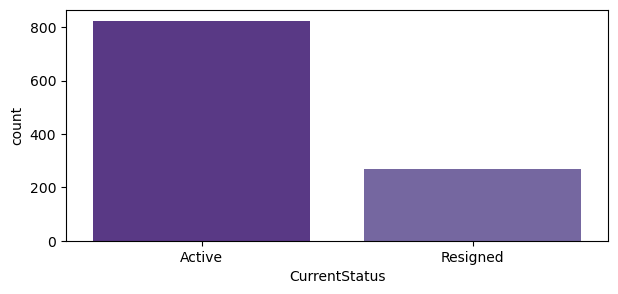

In [57]:
plt.figure(figsize=(7, 3))
plt.xlabel('Current Status')
plt.ylabel('Count')
sns.countplot(data=Final, x='CurrentStatus');

In [58]:
a = (Final[Final["CurrentStatus"] == 'Active'].shape[0] / Final.shape[0])*100
b = (Final[Final["CurrentStatus"] == 'Resigned'].shape[0] / Final.shape[0])*100
print(f"Percentage of 'Active' Employee : {a} %")
print(f"Percentage of 'Resigned' Employee : {b} %")

Percentage of 'Active' Employee : 75.3199268738574 %
Percentage of 'Resigned' Employee : 24.680073126142595 %


**The distribution of 'Active' and 'Resigned' employees is imbalanced**

### EmployeePosition

In [59]:
Final['EmployeePosition'].value_counts()

Level 7     358
Level 8     313
Level 6     233
Level 5      98
Level 4      49
Level 3      20
Level 2      11
Level A2      3
Level A3      3
Level A1      3
Level 1       2
Level 10      1
Name: EmployeePosition, dtype: int64

In [60]:
Final["EmployeePosition"].replace(to_replace=["Level 10","Level 1","Level A1","Level A3",'Level A2'],value="Others",inplace=True)

In [61]:
Final['EmployeePosition'].value_counts()

Level 7    358
Level 8    313
Level 6    233
Level 5     98
Level 4     49
Level 3     20
Others      12
Level 2     11
Name: EmployeePosition, dtype: int64

In [62]:
pd.crosstab(Final['EmployeePosition'],Final["CurrentStatus"])

CurrentStatus     Active  Resigned
EmployeePosition                  
Level 2               10         1
Level 3               19         1
Level 4               41         8
Level 5               80        18
Level 6              177        56
Level 7              273        85
Level 8              213       100
Others                11         1

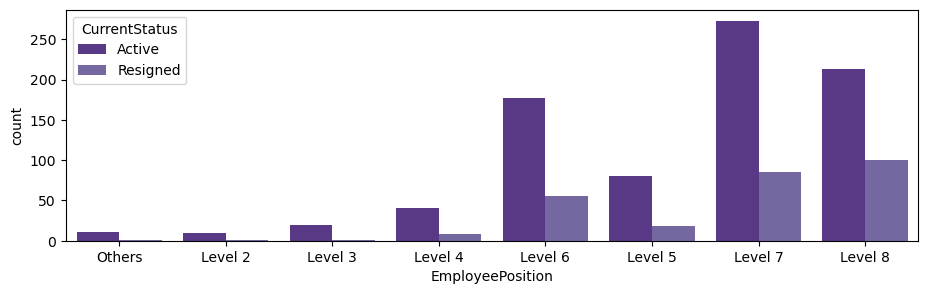

In [63]:
plt.figure(figsize=(11,3))
sns.countplot(x='EmployeePosition', hue='CurrentStatus', data=Final);

**These observations indicate an uneven distribution of employee positions within the dataset, with some levels having a higher presence while others are less represented. The majority of employees fall into 'Level 7' and 'Level 8' categories, while 'Level 1', 'Level 10', and 'Others' have the lowest representation.**

### ProfitCenter

In [64]:
Final['ProfitCenter'].value_counts()

PC - 3     429
PC - 2     341
PC - 1     272
PC - 5      28
PC - 6      18
PC - 7       2
PC - 4       1
PC - 8       1
PC - 11      1
PC - 10      1
Name: ProfitCenter, dtype: int64

In [65]:
Final["ProfitCenter"].replace(to_replace=["PC - 10","PC - 11","PC - 8","PC - 4",'PC - 7'],value="Others",inplace=True)

In [66]:
Final['ProfitCenter'].value_counts()

PC - 3    429
PC - 2    341
PC - 1    272
PC - 5     28
PC - 6     18
Others      6
Name: ProfitCenter, dtype: int64

In [67]:
pd.crosstab(Final['ProfitCenter'],Final["CurrentStatus"])

CurrentStatus  Active  Resigned
ProfitCenter                   
Others              3         3
PC - 1            221        51
PC - 2            263        78
PC - 3            337        92
PC - 5              0        28
PC - 6              0        18

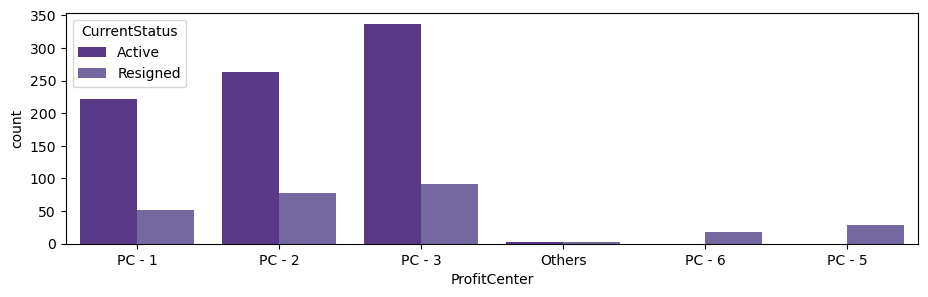

In [68]:
plt.figure(figsize=(11,3))
sns.countplot(x='ProfitCenter', hue='CurrentStatus',data=Final);

**The 'ProfitCenter' column exhibits an imbalanced distribution, with PC-3 being the most frequently occurring category, followed by PC-2 and PC-1. PC-5, PC-6, and 'Others' have considerably fewer occurrences.**

### EmployeeLocation

In [69]:
Final['EmployeeLocation'].value_counts()

Location 1    344
Location 7    297
Location 3    243
Location 9     61
Location 2     48
Location 8     43
Location 4     43
Location 5      8
Location 6      7
Name: EmployeeLocation, dtype: int64

In [70]:
Final["EmployeeLocation"].replace(to_replace=["Location 5","Location 6"],value="Others",inplace=True)

In [71]:
Final['EmployeeLocation'].value_counts()

Location 1    344
Location 7    297
Location 3    243
Location 9     61
Location 2     48
Location 8     43
Location 4     43
Others         15
Name: EmployeeLocation, dtype: int64

In [72]:
pd.crosstab(Final['EmployeeLocation'],Final["CurrentStatus"])

CurrentStatus     Active  Resigned
EmployeeLocation                  
Location 1           266        78
Location 2            31        17
Location 3           178        65
Location 4            33        10
Location 7           218        79
Location 8            39         4
Location 9            47        14
Others                12         3

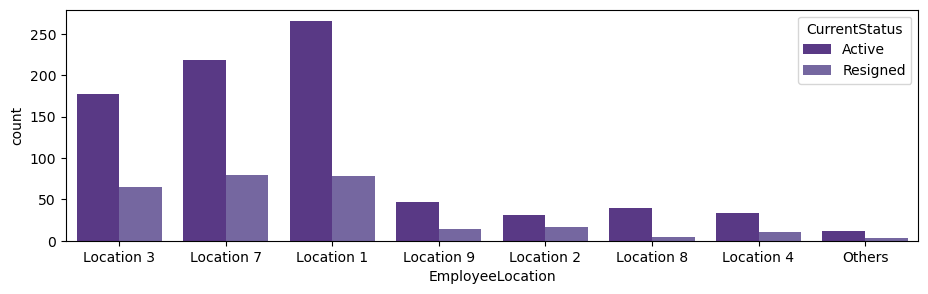

In [73]:
plt.figure(figsize=(11,3))
sns.countplot(x='EmployeeLocation', hue='CurrentStatus', data=Final);

**The 'EmployeeLocation' column shows an imbalanced distribution among the different categories. The majority of employees are assigned to Location 1, which has the highest count of 344. In contrast, Locations 9, 2, 8, and 4 have a relatively smaller number of employees, each with counts of 61, 48, 43, and 43 respectively.**

### PeopleGroup

In [74]:
Final['PeopleGroup'].value_counts()

Client Service Staff    1084
Support Staff             10
Name: PeopleGroup, dtype: int64

In [75]:
pd.crosstab(Final['PeopleGroup'],Final["CurrentStatus"])

CurrentStatus         Active  Resigned
PeopleGroup                           
Client Service Staff     815       269
Support Staff              9         1

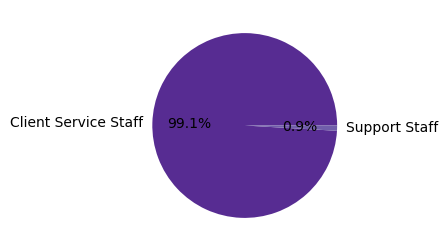

In [76]:
plt.figure(figsize=(11,3))
plt.pie(Final['PeopleGroup'].value_counts(), labels=Final['PeopleGroup'].value_counts().index, autopct='%1.1f%%');

**The 'PeopleGroup' column exhibits an imbalanced distribution, with 'Client Service Staff' being the predominant category, occurring 1084 times. The category 'Support Staff' has significantly fewer occurrences, appearing only 10 times.**

### Supervisorname

In [77]:
Final['Supervisorname'].value_counts()

Hedi Elna              20
Cacilia Aimee          20
Tallia Eyde            18
Myrtie Brana           16
Jolyn Briney           16
Orsa Margeaux          16
Jillian Lorelei        15
Lindy Marguerite       15
Trenna Mureil          15
Terza Gwyn             14
Guenevere Florida      14
Ali Elsinore           14
Kynthia Hildy          14
Dottie Bidget          14
Laetitia Yoshi         13
Frances Mignonne       13
Rosabella Arlina       13
Tiena Hatti            13
Daryl Natalina         12
Nikolia Shirl          12
Annnora Gabrielle      12
Gert Editha            12
Ophelie Jyoti          12
Nerita Anet            12
Marys Essy             11
Danette Melinda        11
Misti Helena           11
Aimil Latisha          11
Lian Harley            11
Tatiana Roxanna        11
Lenora Nydia           11
Orelee Hanna           11
Rochette Jilleen       10
Revkah Stephie         10
Vonni Bethena          10
Christina Desdemona    10
Marney Anderea         10
Imelda Madalena        10
Cherise Lain

In [78]:
vals = Final['Supervisorname'].value_counts().loc[lambda x: x <= 12].index
Final["Supervisorname"].replace(to_replace = vals ,value="Others",inplace=True)

In [79]:
Final['Supervisorname'].value_counts()

Others               821
Cacilia Aimee         20
Hedi Elna             20
Tallia Eyde           18
Orsa Margeaux         16
Myrtie Brana          16
Jolyn Briney          16
Lindy Marguerite      15
Trenna Mureil         15
Jillian Lorelei       15
Kynthia Hildy         14
Dottie Bidget         14
Guenevere Florida     14
Ali Elsinore          14
Terza Gwyn            14
Frances Mignonne      13
Laetitia Yoshi        13
Tiena Hatti           13
Rosabella Arlina      13
Name: Supervisorname, dtype: int64

In [80]:
pd.crosstab(Final['Supervisorname'],Final["CurrentStatus"])

CurrentStatus      Active  Resigned
Supervisorname                     
Ali Elsinore           10         4
Cacilia Aimee          14         6
Dottie Bidget          11         3
Frances Mignonne        7         6
Guenevere Florida       6         8
Hedi Elna              10        10
Jillian Lorelei        13         2
Jolyn Briney           12         4
Kynthia Hildy           9         5
Laetitia Yoshi         10         3
Lindy Marguerite        6         9
Myrtie Brana            9         7
Orsa Margeaux           7         9
Others                648       173
Rosabella Arlina       10         3
Tallia Eyde            11         7
Terza Gwyn              8         6
Tiena Hatti            12         1
Trenna Mureil          11         4

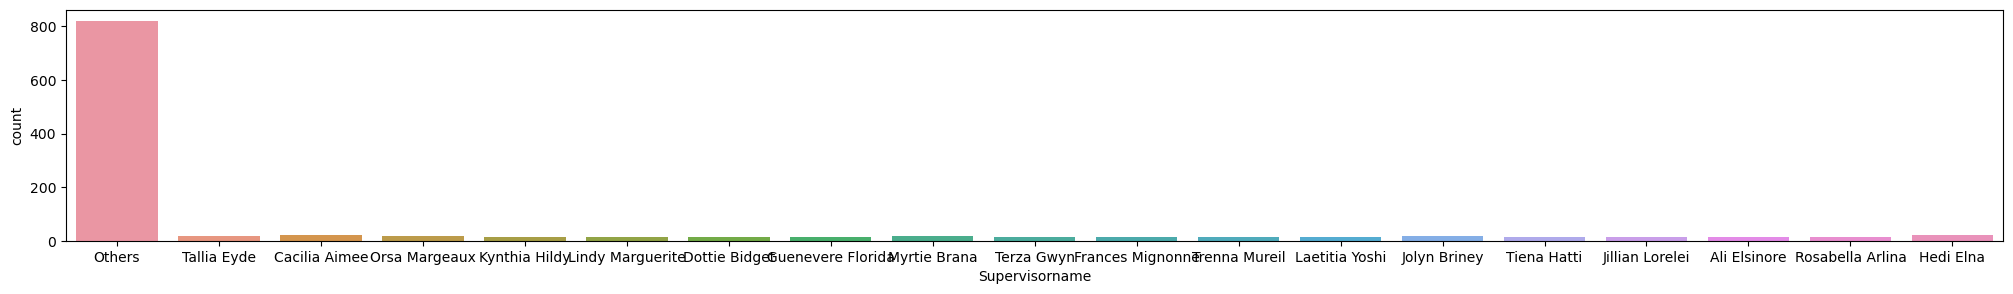

In [81]:
plt.figure(figsize=(25, 3))
sns.countplot(Final['Supervisorname']);

**The 'Supervisorname' column shows an uneven distribution, with one dominant category ('Others') and a wide variation in occurrence for the named supervisors.**

### EmployeeCategory

In [82]:
Final['EmployeeCategory'].value_counts()

Confirmed Staff                        676
Serving Notice Period                  160
Resigned                               138
Staff on Probation                      91
SVP/VP                                   9
Secondee-Outward-Without Pay             9
Awaiting Termination                     3
Confirmed Staff (Part-Time 6 Hours)      2
Confirmed-Sabbatical                     2
Fixed term Staff                         2
Level 1/2                                1
Confirmed Staff (Part-Time 4 Hours)      1
Name: EmployeeCategory, dtype: int64

In [83]:
remove = ['Awaiting Termination','Confirmed Staff (Part-Time 6 Hours)','Confirmed-Sabbatical','Fixed term Staff',
         'Level 1/2','Confirmed Staff (Part-Time 4 Hours)']

In [84]:
Final["EmployeeCategory"].replace(to_replace = remove,value="Others",inplace=True)

In [85]:
Final['EmployeeCategory'].value_counts()

Confirmed Staff                 676
Serving Notice Period           160
Resigned                        138
Staff on Probation               91
Others                           11
SVP/VP                            9
Secondee-Outward-Without Pay      9
Name: EmployeeCategory, dtype: int64

In [86]:
pd.crosstab(Final['EmployeeCategory'],Final["CurrentStatus"])

CurrentStatus                 Active  Resigned
EmployeeCategory                              
Confirmed Staff                  676         0
Others                            10         1
Resigned                           0       138
SVP/VP                             9         0
Secondee-Outward-Without Pay       9         0
Serving Notice Period             30       130
Staff on Probation                90         1

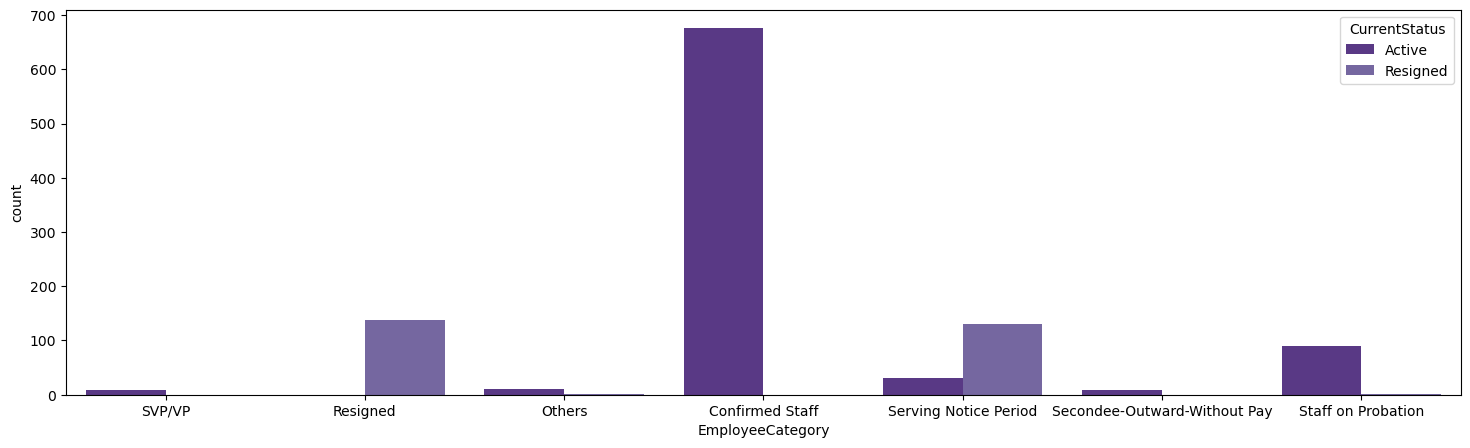

In [87]:
plt.figure(figsize=(18,5))
sns.countplot(x='EmployeeCategory', hue='CurrentStatus', data=Final);

**The 'EmployeeCategory' column demonstrates a distribution of employees across different categories, with 'Confirmed Staff' being the largest category, followed by 'Serving Notice Period', 'Resigned', 'Staff on Probation', and a smaller number of employees falling into 'Others', 'SVP/VP', and 'Secondee-Outward-Without Pay' categories.**

### TotalHours_year_

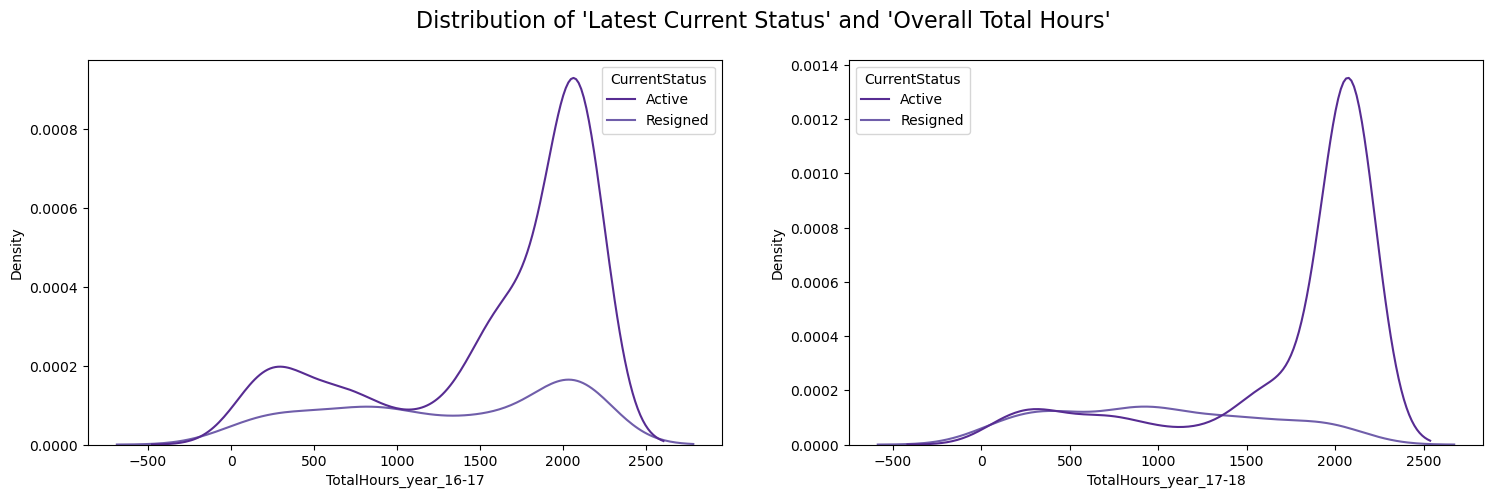

In [88]:
# TotalHours_year_ distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
plt.suptitle("Distribution of 'Latest Current Status' and 'Overall Total Hours'", fontsize=16)
sns.kdeplot(data=Final, x='TotalHours_year_16-17', hue='CurrentStatus', ax=axes[0])
sns.kdeplot(data=Final, x='TotalHours_year_17-18', hue='CurrentStatus', ax=axes[1]);

###  TotalAvailableHours_year_

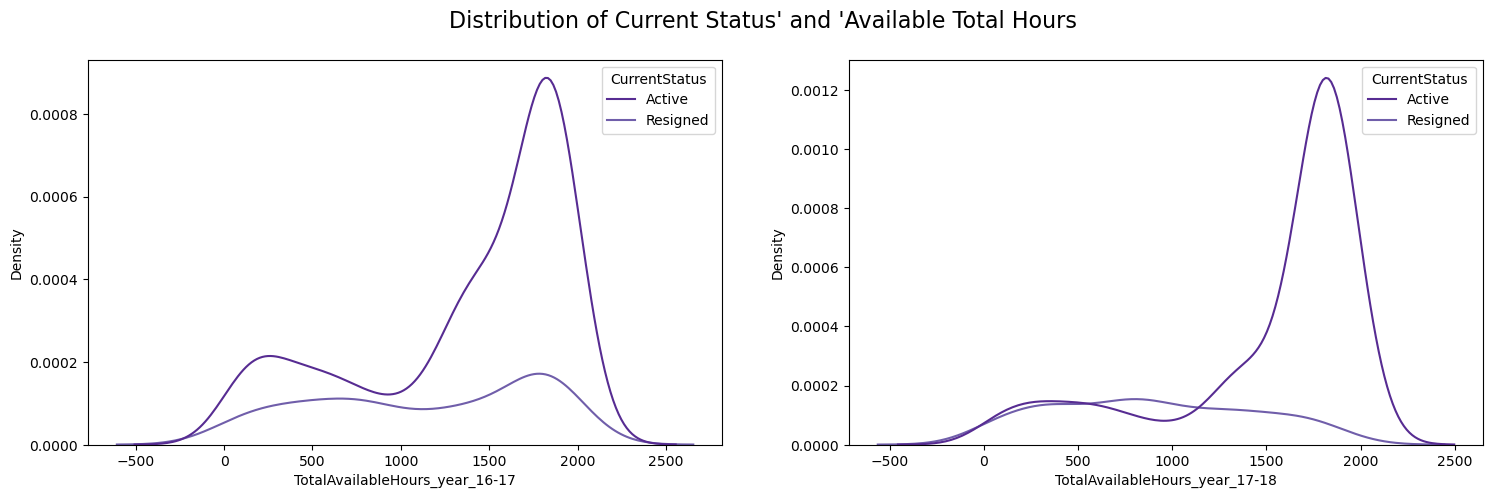

In [89]:
# TotalHours_year_ distribution
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
plt.suptitle("Distribution of Current Status' and 'Available Total Hours", fontsize=16)
sns.kdeplot(data=Final, x='TotalAvailableHours_year_16-17', hue='CurrentStatus', ax=axes[0])
sns.kdeplot(data=Final, x='TotalAvailableHours_year_17-18', hue='CurrentStatus', ax=axes[1]);

### WorkHours_year_

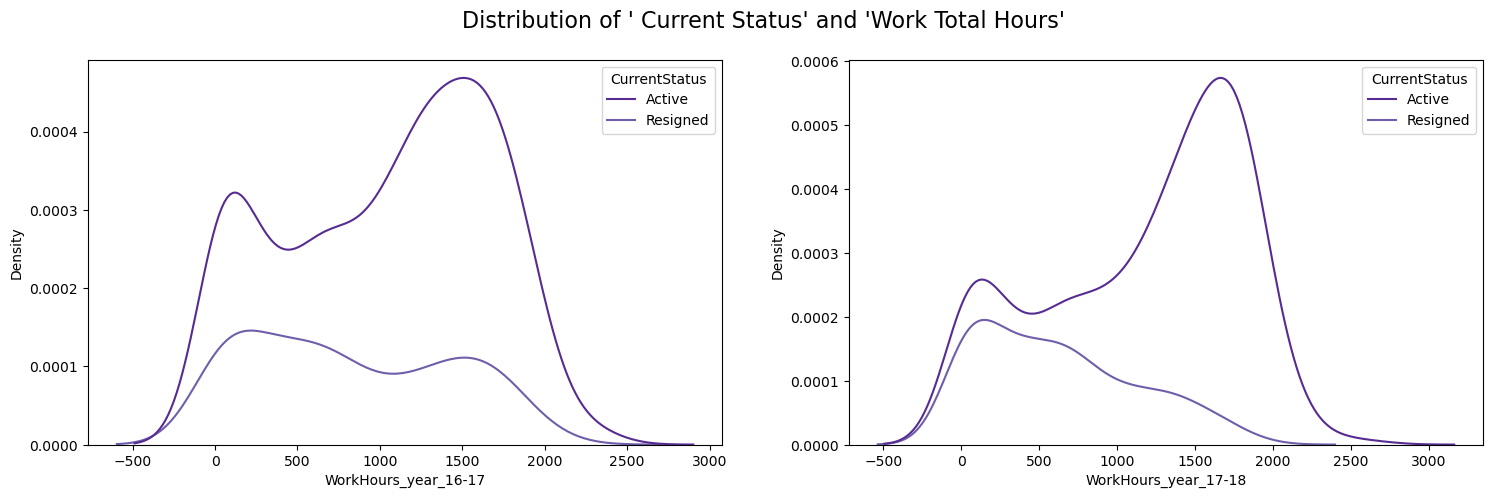

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
plt.suptitle("Distribution of ' Current Status' and 'Work Total Hours'", fontsize=16)
sns.kdeplot(data=Final, x='WorkHours_year_16-17', hue='CurrentStatus', ax=axes[0])
sns.kdeplot(data=Final, x='WorkHours_year_17-18', hue='CurrentStatus', ax=axes[1]);

### LeaveHours_year_16-17 

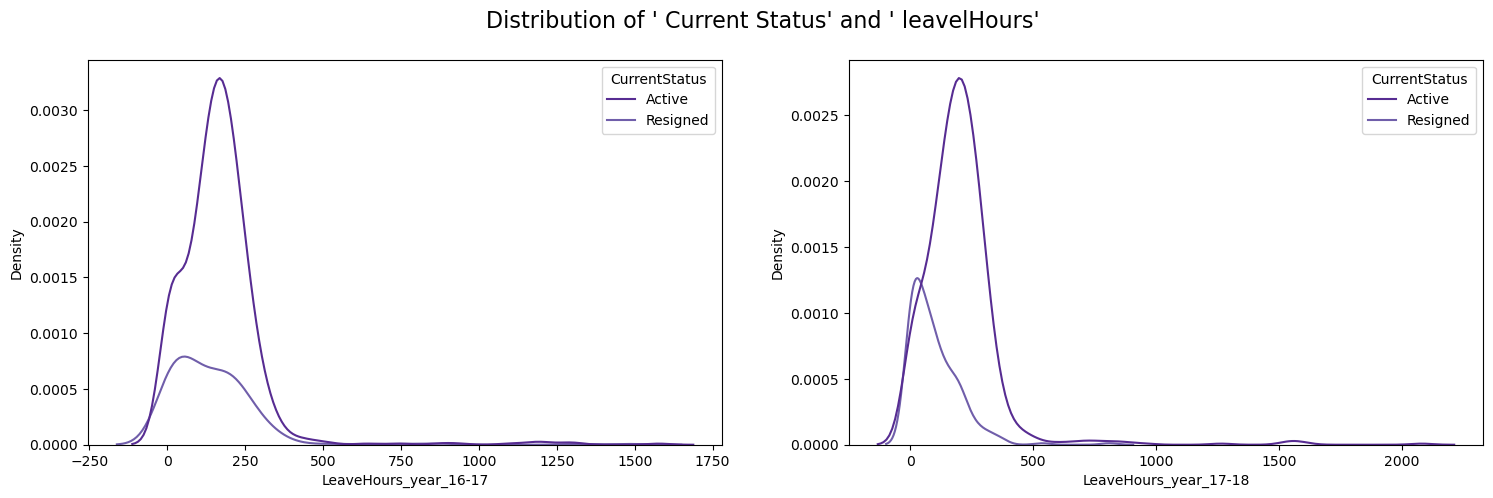

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
plt.suptitle("Distribution of ' Current Status' and ' leavelHours'", fontsize=16)
sns.kdeplot(data=Final, x='LeaveHours_year_16-17', hue='CurrentStatus', ax=axes[0])
sns.kdeplot(data=Final, x='LeaveHours_year_17-18', hue='CurrentStatus', ax=axes[1]);

### TrainingHours_year_16-17

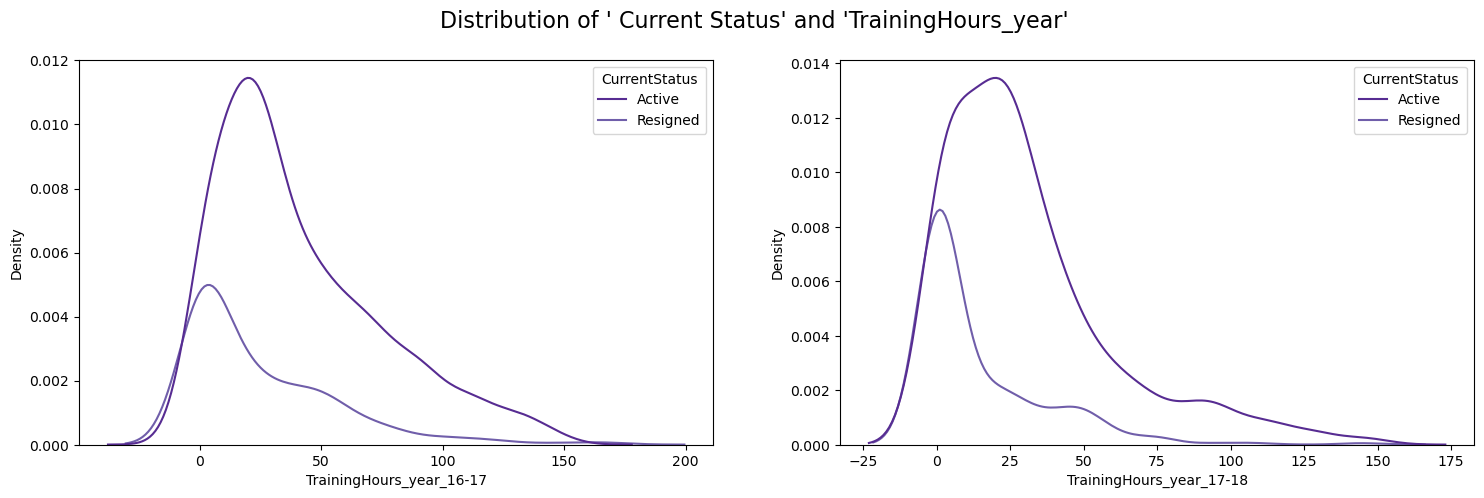

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
plt.suptitle("Distribution of ' Current Status' and 'TrainingHours_year'", fontsize=16)
sns.kdeplot(data=Final, x='TrainingHours_year_16-17', hue='CurrentStatus', ax=axes[0])
sns.kdeplot(data=Final, x='TrainingHours_year_17-18',hue='CurrentStatus', ax=axes[1]);

### BDHours_year_16-17

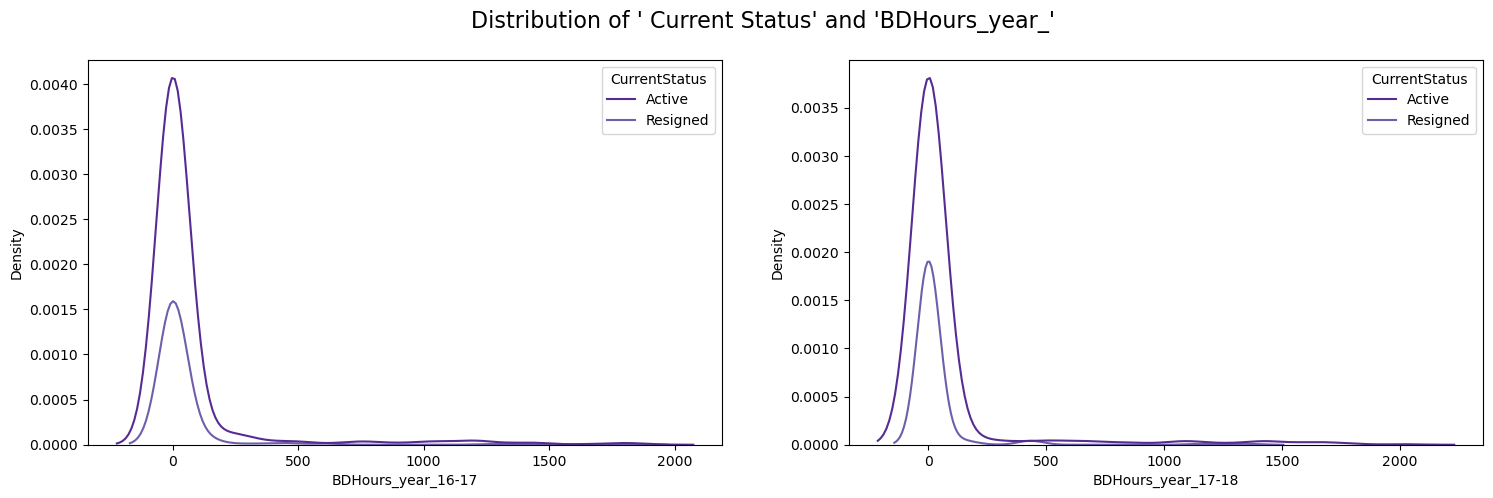

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
plt.suptitle("Distribution of ' Current Status' and 'BDHours_year_'", fontsize=16)
sns.kdeplot(data=Final, x='BDHours_year_16-17', hue='CurrentStatus', ax=axes[0])
sns.kdeplot(data=Final, x='BDHours_year_17-18',hue='CurrentStatus', ax=axes[1]);

### NCHours_year_

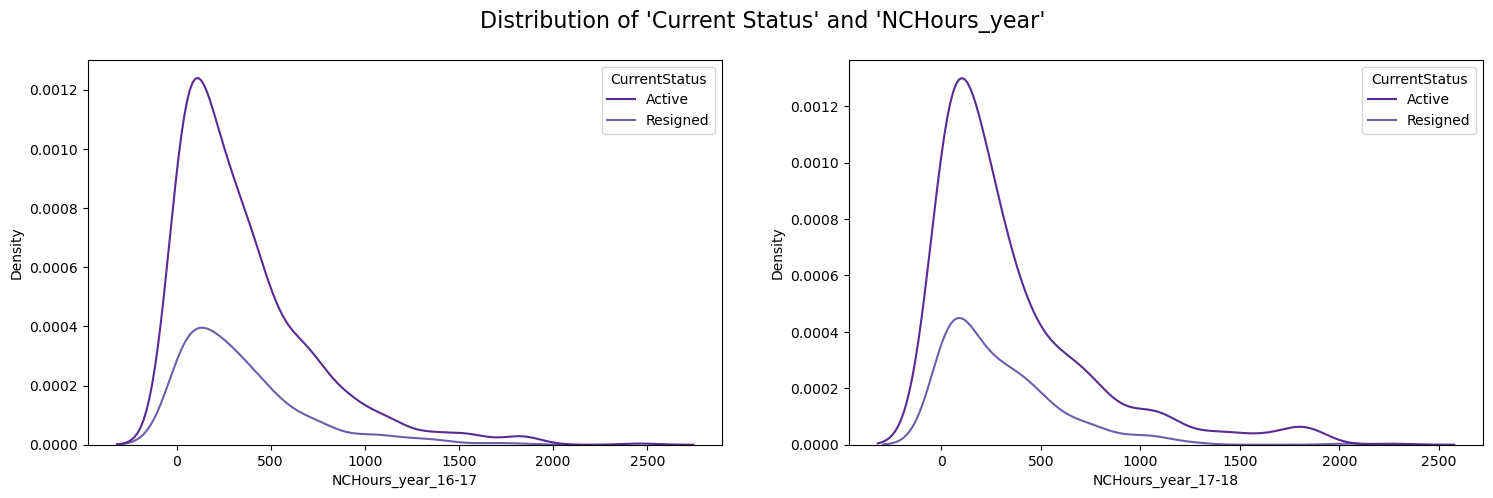

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
plt.suptitle("Distribution of 'Current Status' and 'NCHours_year'", fontsize=16)
sns.kdeplot(data=Final, x='NCHours_year_16-17', hue='CurrentStatus', ax=axes[0])
sns.kdeplot(data=Final, x='NCHours_year_17-18', hue='CurrentStatus', ax=axes[1]);

### Utilization%_year_

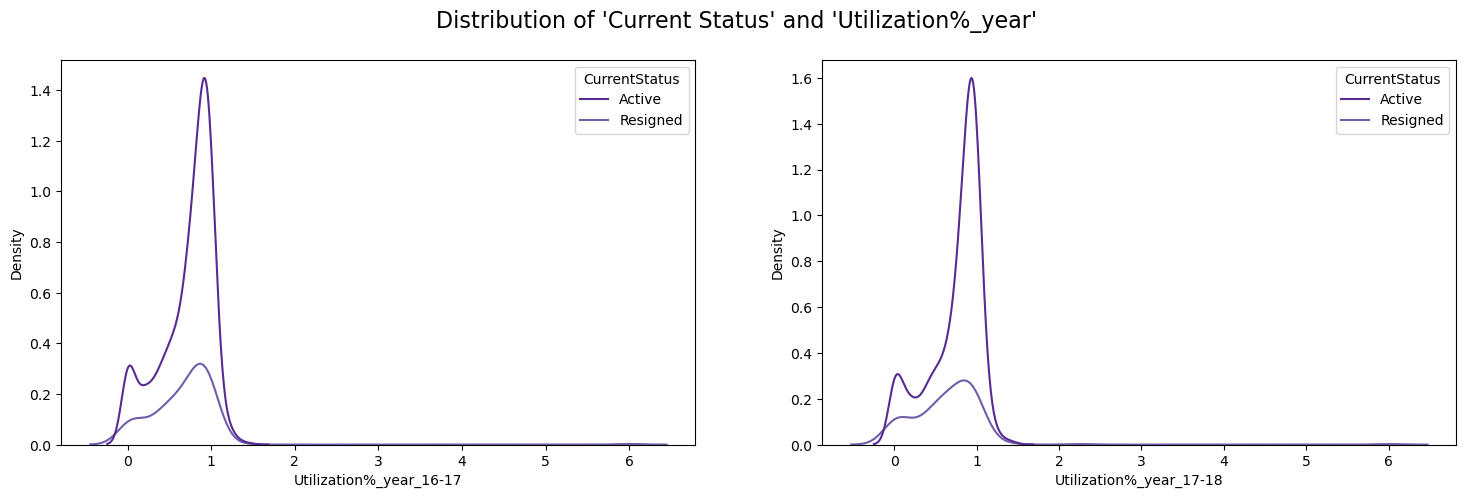

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
plt.suptitle("Distribution of 'Current Status' and 'Utilization%_year'", fontsize=16)
sns.kdeplot(data=Final, x='Utilization%_year_16-17', hue='CurrentStatus', ax=axes[0])
sns.kdeplot(data=Final, x='Utilization%_year_17-18', hue='CurrentStatus', ax=axes[1]);

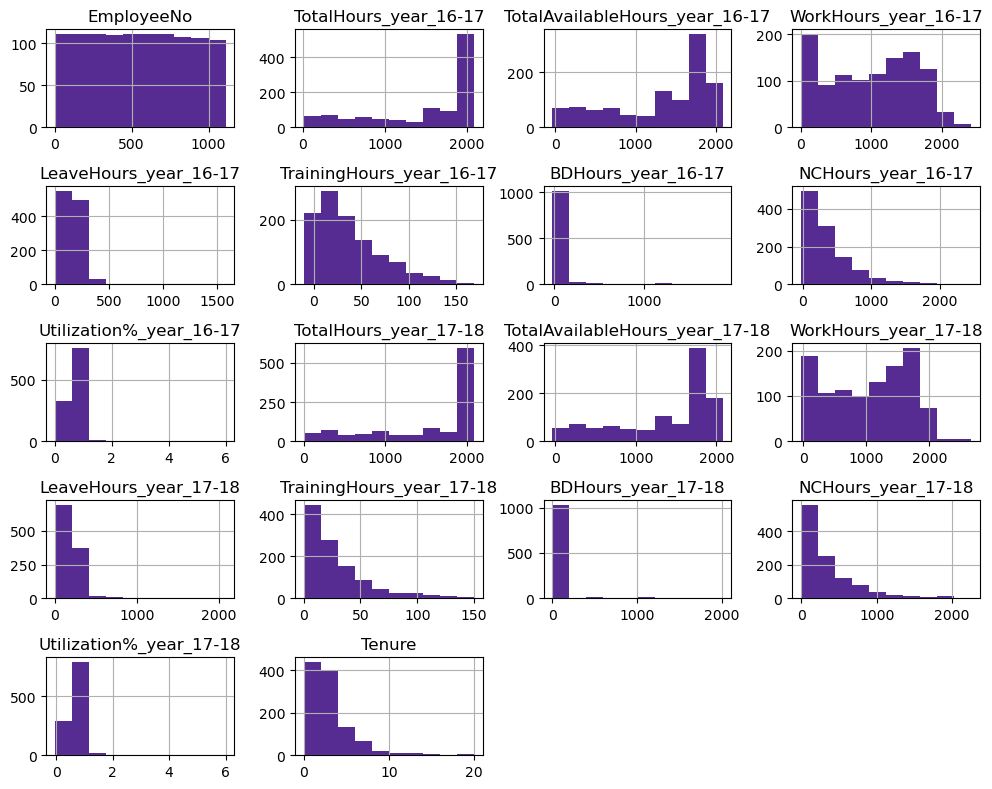

In [96]:
Final.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

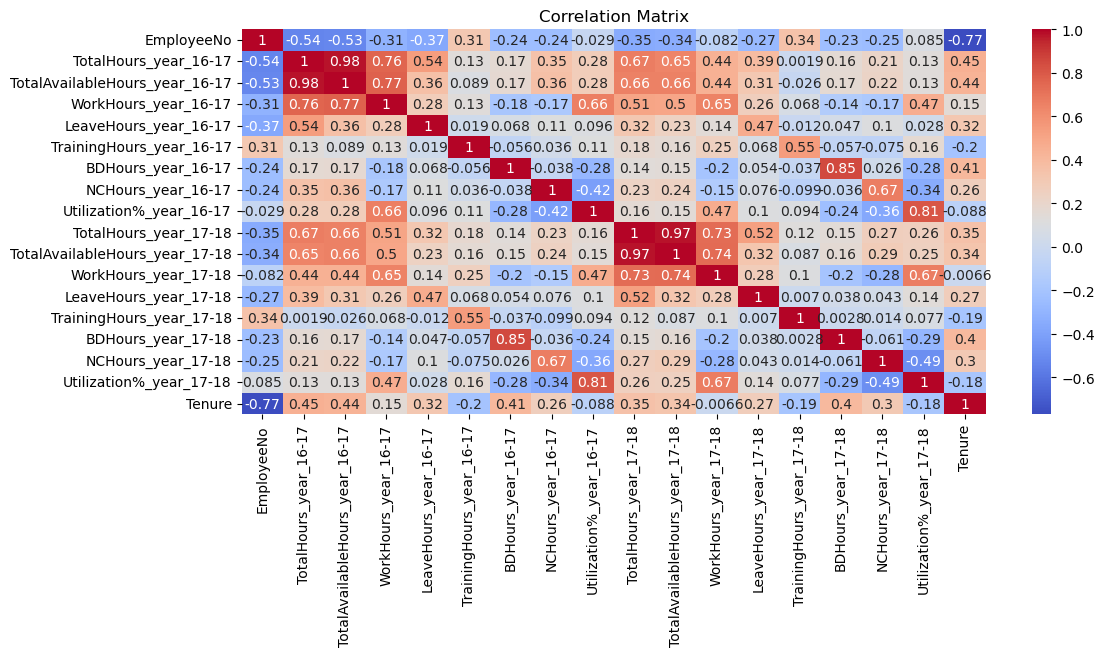

In [97]:
plt.figure(figsize=(12,5))
plt.title('Correlation Matrix')
sns.heatmap(Final.corr(), annot=True, cmap='coolwarm');

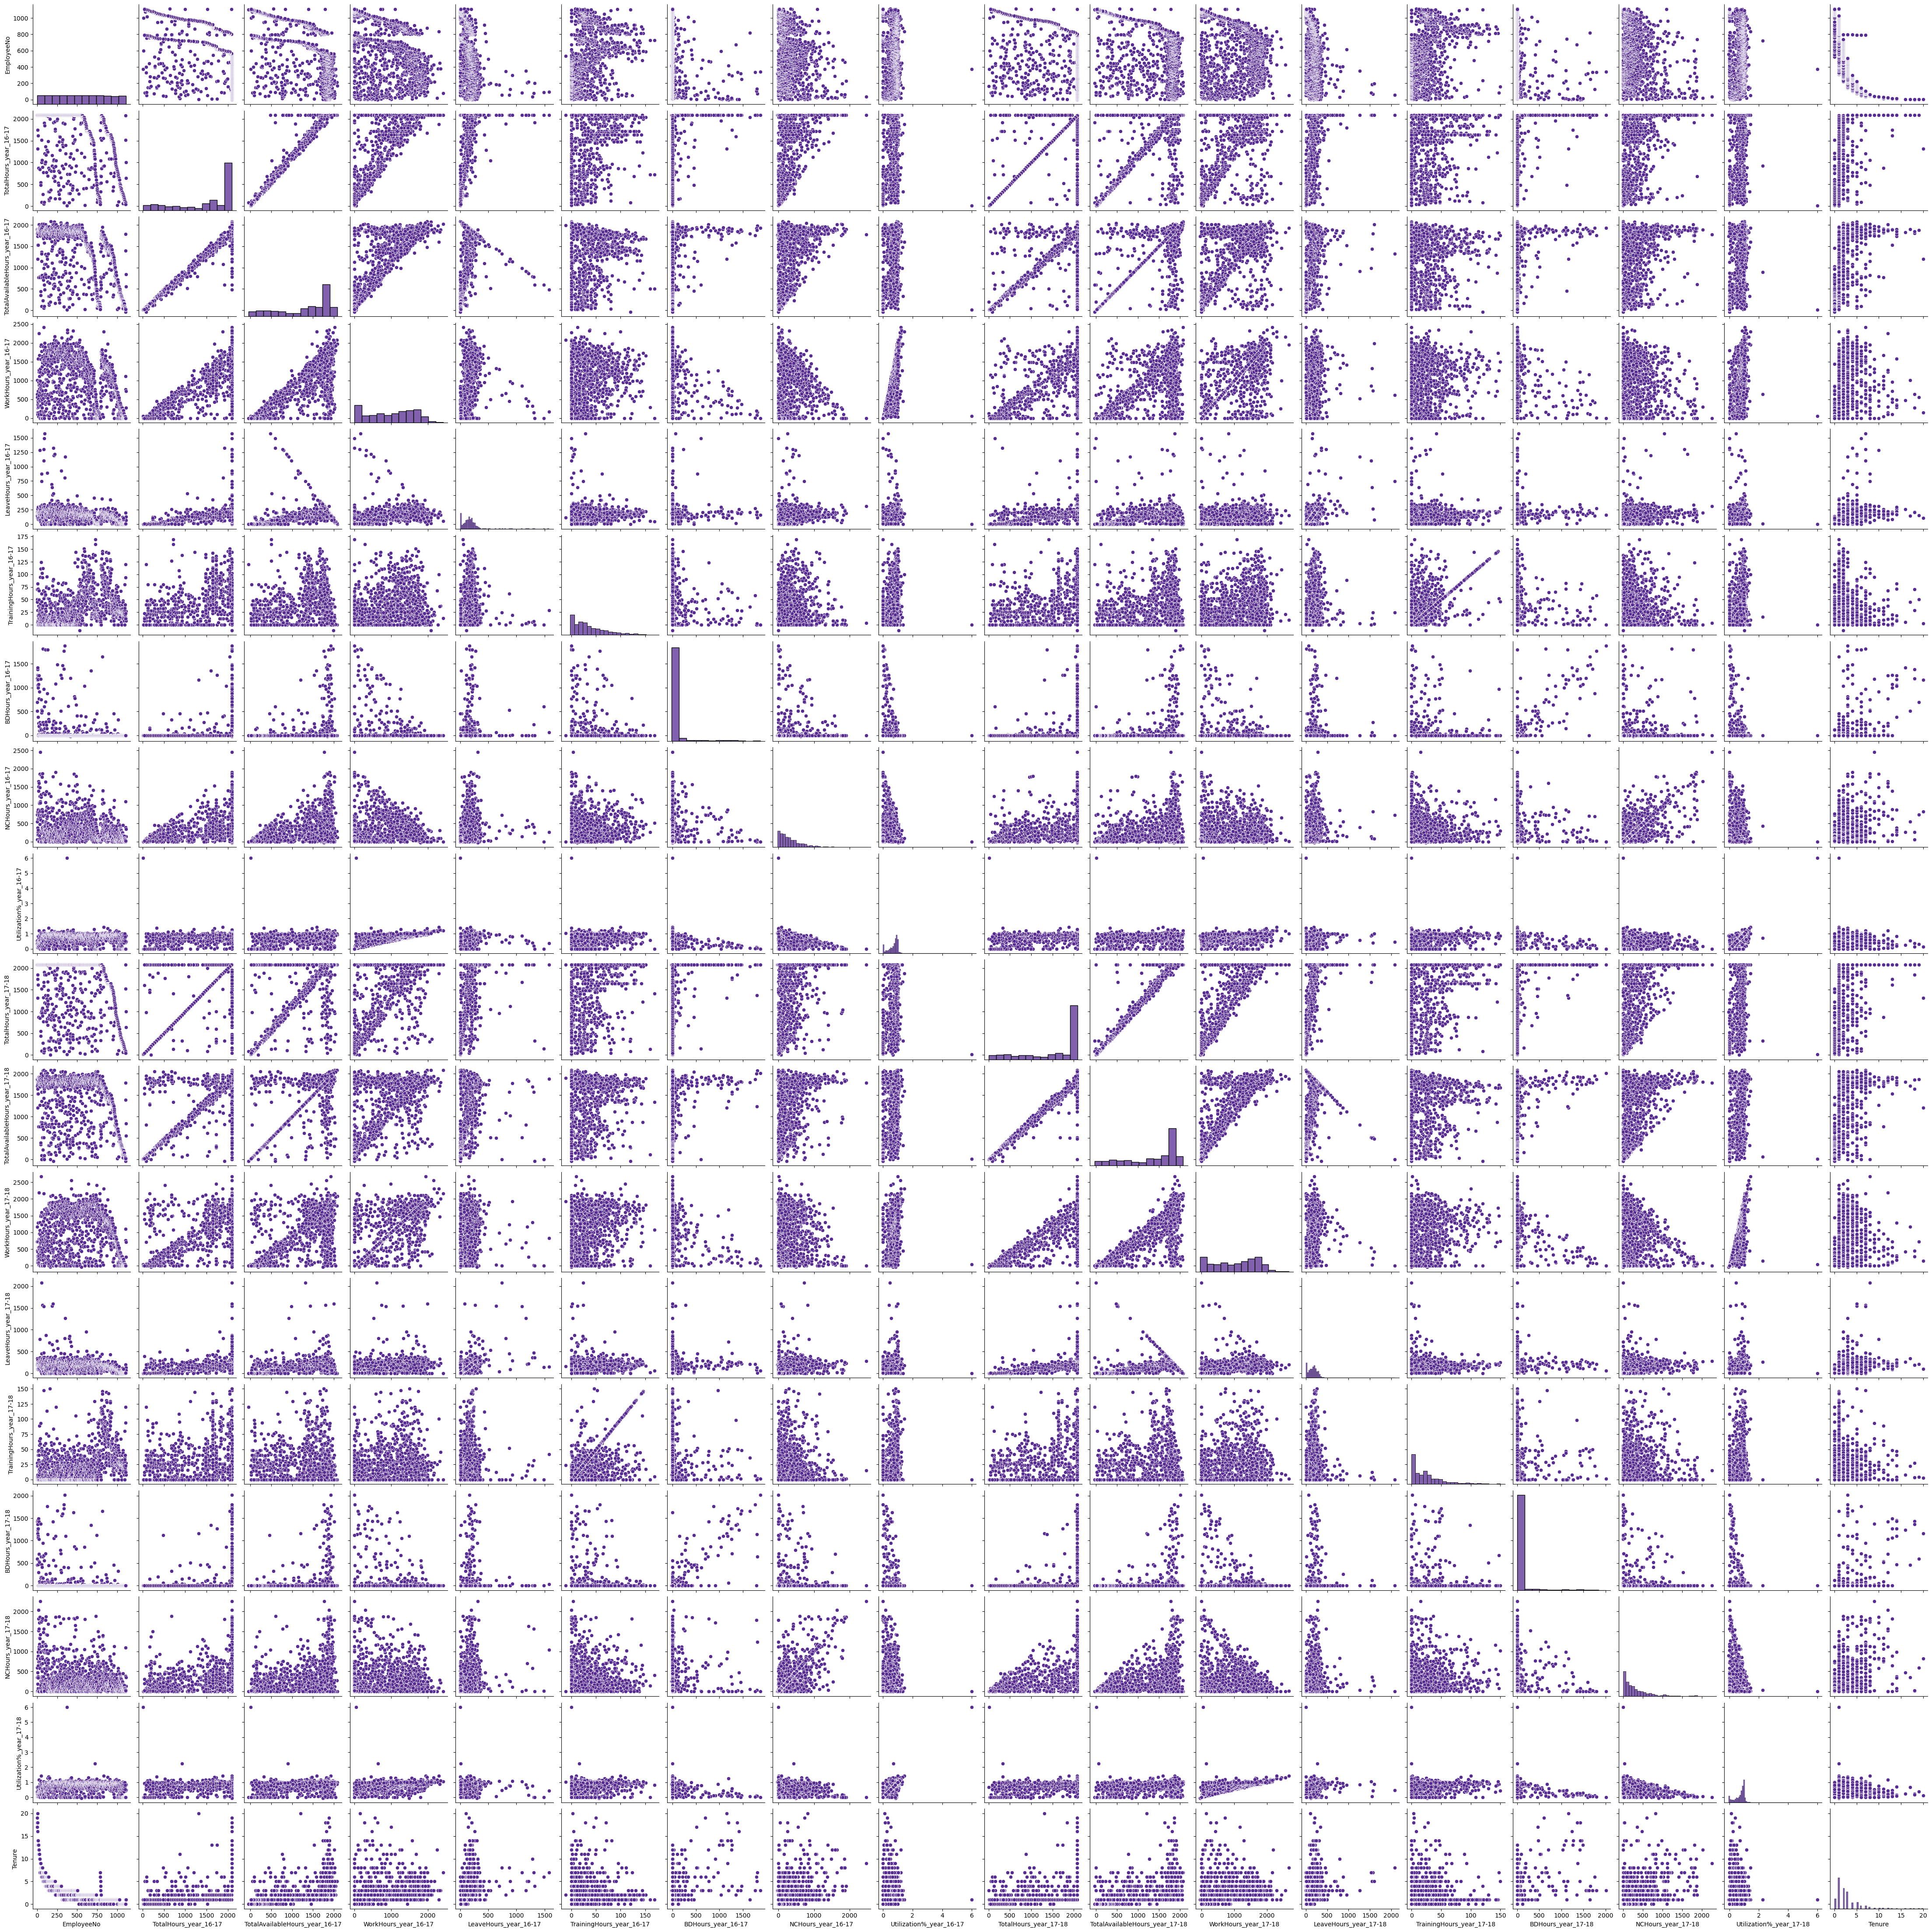

In [98]:
sns.pairplot(data=Final);

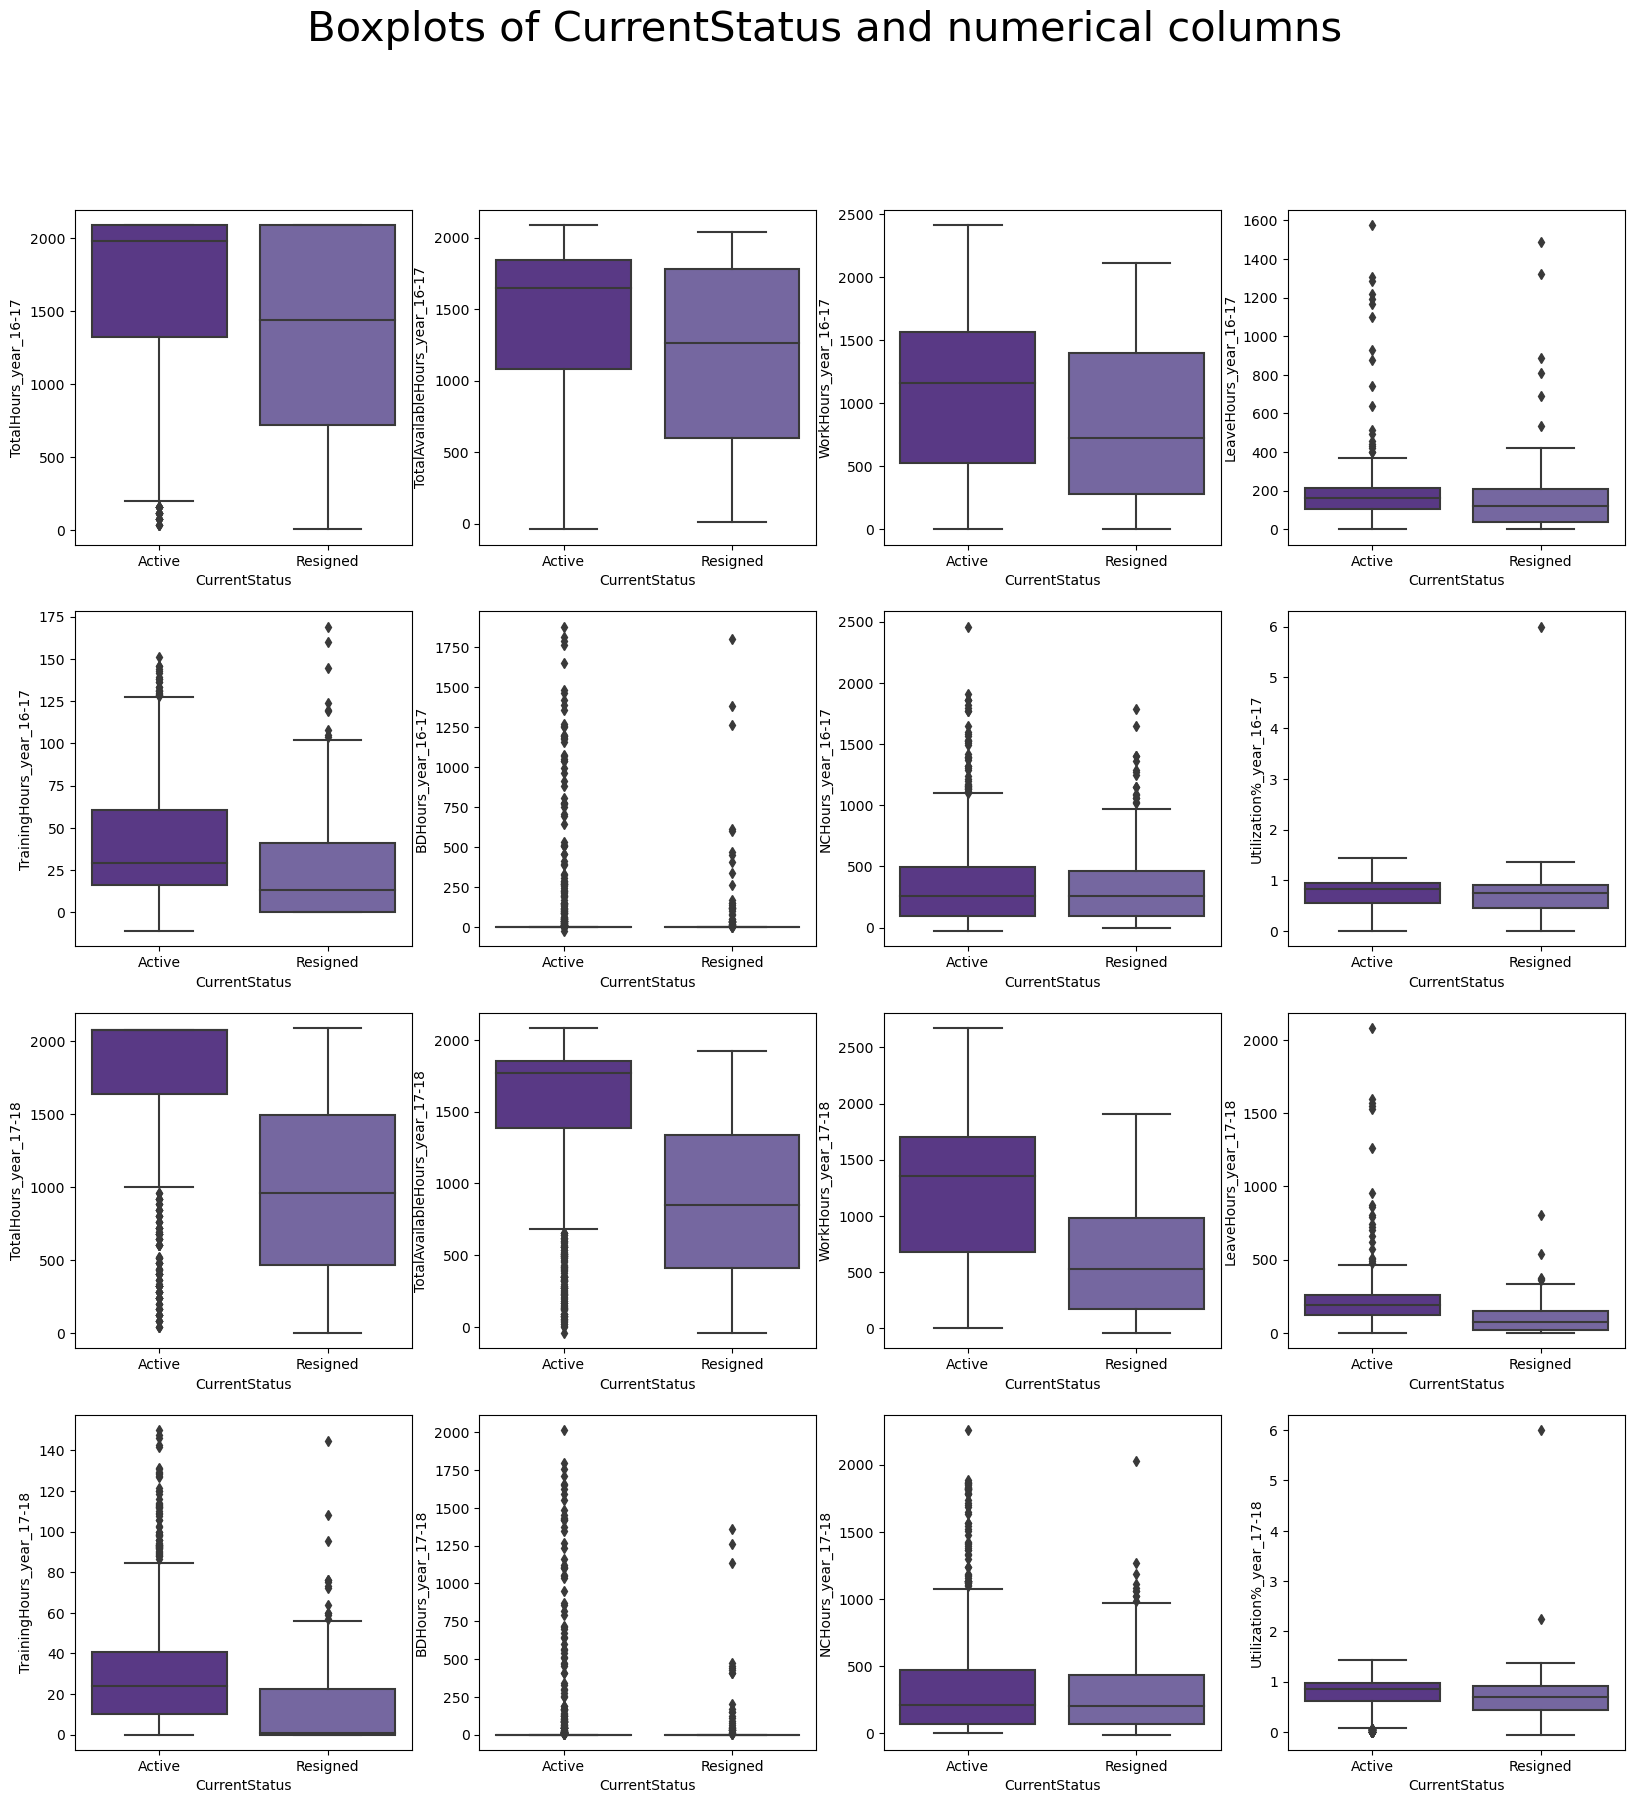

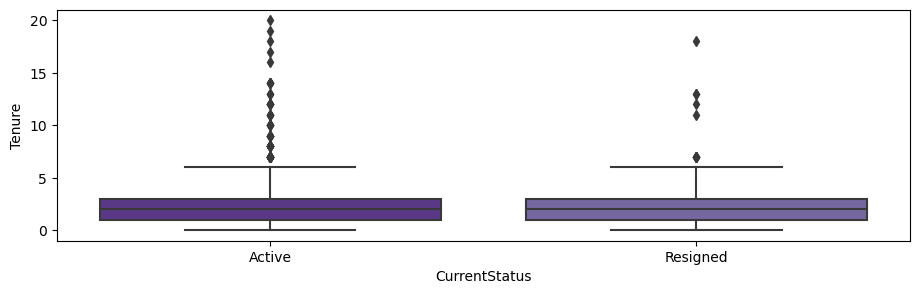

In [99]:
target_var = 'CurrentStatus'
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle('Boxplots of CurrentStatus and numerical columns', fontsize=30)

sns.boxplot(ax=axes[0,0],data=Final, x=target_var, y='TotalHours_year_16-17')
sns.boxplot(ax=axes[0,1],data=Final, x=target_var, y='TotalAvailableHours_year_16-17')
sns.boxplot(ax=axes[0,2],data=Final, x=target_var, y='WorkHours_year_16-17')
sns.boxplot(ax=axes[0,3],data=Final, x=target_var, y='LeaveHours_year_16-17')
sns.boxplot(ax=axes[1,0],data=Final, x=target_var, y='TrainingHours_year_16-17')
sns.boxplot(ax=axes[1,1],data=Final, x=target_var, y='BDHours_year_16-17')
sns.boxplot(ax=axes[1,2],data=Final, x=target_var, y='NCHours_year_16-17')
sns.boxplot(ax=axes[1,3],data=Final, x=target_var, y='Utilization%_year_16-17')
sns.boxplot(ax=axes[2,0],data=Final, x=target_var, y='TotalHours_year_17-18')
sns.boxplot(ax=axes[2,1],data=Final, x=target_var, y='TotalAvailableHours_year_17-18')
sns.boxplot(ax=axes[2,2],data=Final, x=target_var, y='WorkHours_year_17-18')
sns.boxplot(ax=axes[2,3],data=Final, x=target_var, y='LeaveHours_year_17-18')
sns.boxplot(ax=axes[3,0],data=Final, x=target_var, y='TrainingHours_year_17-18')
sns.boxplot(ax=axes[3,1],data=Final, x=target_var, y='BDHours_year_17-18')
sns.boxplot(ax=axes[3,2],data=Final, x=target_var, y='NCHours_year_17-18')
sns.boxplot(ax=axes[3,3],data=Final, x=target_var, y='Utilization%_year_17-18');

plt.figure(figsize=(11,3))
sns.boxplot(data=Final, x=target_var, y='Tenure');

## Performing Statistical Tests

### CHI_SQAURE TEST

In [100]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Col_name', 'p_value', 'Result'])

In [101]:
# Define the function
def run_chi2_test(column):
    cross_tab = pd.crosstab(Final[column], Final["CurrentStatus"])
    stat, p, dof, expected = chi2_contingency(cross_tab)

    alpha = 0.05
    
    # Check if p-value is less than or equal to alpha
    if p <= alpha:
        result = 'Dependent'
    else:
        result = 'Independent'
    
    # Append the results to the DataFrame
    results_df.loc[len(results_df)] = [column, p, result]

In [102]:
# List of categorical columns (excluding "CurrentStatus")
categorical_cols = [col for col in Final.columns if col != 'CurrentStatus' and Final[col].dtype == 'object']

# Run the function for each categorical column
for col in categorical_cols:
    run_chi2_test(col)

# Print the results DataFrame
results_df

Col_name        p_value       Result
0  EmployeePosition   4.789491e-03    Dependent
1      ProfitCenter   9.884321e-31    Dependent
2  EmployeeLocation   1.541058e-01  Independent
3       PeopleGroup   4.756883e-01  Independent
4  EmployeeCategory  1.543157e-202    Dependent
5    Supervisorname   1.495999e-05    Dependent

In [103]:
independent_cols = results_df.loc[results_df['Result'] == 'Independent', 'Col_name'].values.tolist()
independent_cols

['EmployeeLocation', 'PeopleGroup']

### ANOVA AND T-TEST

In [104]:
# DataFrame to store the results
results_df_1 = pd.DataFrame(columns=["Col_name", "p_value", "ANOVA_Result", "t_test_result"])

In [105]:
def perform_anova_and_ttest(col):
    model = ols(f'Final["{col}"] ~ Final["CurrentStatus"]', data=Final).fit()

    anova_result = sm.stats.anova_lm(model, type=2)
    anova_pvalue = anova_result["PR(>F)"][0]
    anova_result = 'Dependent' if anova_pvalue <= 0.05 else 'Independent'

    t_statistic, t_pvalue = stats.ttest_ind(Final[col][Final["CurrentStatus"] == "Active"],
                                            Final[col][Final["CurrentStatus"] == "Resigned"])
    t_result = 'Difference in the means' if t_pvalue <= 0.05 else 'Same means'

    global results_df_1
    results_df_1 = results_df_1.append({"Col_name": col,
                                        "p_value": anova_pvalue,
                                        "ANOVA_Result": anova_result,
                                        "t_test_result": t_result}, ignore_index=True)
    return results_df_1

In [106]:
numerical_cols = [col for col in Final.columns if col != 'EmployeeNo' and Final[col].dtype != 'object']

In [107]:
for col in numerical_cols:
    perform_anova_and_ttest(col)

results_df_1

Col_name       p_value ANOVA_Result  \
0            TotalHours_year_16-17  3.756275e-09    Dependent   
1   TotalAvailableHours_year_16-17  1.145574e-08    Dependent   
2             WorkHours_year_16-17  4.493130e-07    Dependent   
3            LeaveHours_year_16-17  4.100155e-02    Dependent   
4         TrainingHours_year_16-17  1.505003e-11    Dependent   
5               BDHours_year_16-17  5.819664e-02  Independent   
6               NCHours_year_16-17  3.926965e-01  Independent   
7          Utilization%_year_16-17  9.419836e-02  Independent   
8            TotalHours_year_17-18  3.174909e-64    Dependent   
9   TotalAvailableHours_year_17-18  4.374000e-56    Dependent   
10            WorkHours_year_17-18  2.332877e-37    Dependent   
11           LeaveHours_year_17-18  5.533496e-21    Dependent   
12        TrainingHours_year_17-18  1.154112e-17    Dependent   
13              BDHours_year_17-18  1.708362e-02    Dependent   
14              NCHours_year_17-18  2.118802e-02    Dependent   
15         Utilization%_year_17-18  5.882858e-05    Dependent   
16                          Tenure  1.804937e-02    Dependent   

              t_test_result  
0   Difference in the means  
1   Difference in the means  
2   Difference in the means  
3   Difference in the means  
4   Difference in the means  
5                Same means  
6                Same means  
7                Same means  
8   Difference in the means  
9   Difference in the means  
10  Difference in the means  
11  Difference in the means  
12  Difference in the means  
13  Difference in the means  
14  Difference in the means  
15  Difference in the means  
16  Difference in the means

In [108]:
independent_cols.extend(results_df_1.loc[results_df_1['ANOVA_Result'] == 'Independent', 'Col_name'])
independent_cols

['EmployeeLocation',
 'PeopleGroup',
 'BDHours_year_16-17',
 'NCHours_year_16-17',
 'Utilization%_year_16-17']

In [109]:
# Remove the independent columns
for col in independent_cols:
    Final = Final.drop([col], axis=1)

In [110]:
Final.to_excel("final_data.xlsx", index=False)